In [ ]:
# Estándar
from itertools import combinations

# Científicas
import numpy as np
import pandas as pd
import scipy.stats as stats

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter / IPython
from IPython.display import display, Math

import pandas as pd
import ast
# from sklearn.preprocessing import MultiLabelBinarizer
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pandas as pd
import ast
import re
import numpy as np
import unicodedata
import re
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import scipy.stats as stats
# from statsmodels.tools.eval_measures import rmse
# from statsmodels.stats.diagnostic import het_breuschpagan
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# EDA basico

In [155]:
df = pd.read_csv('data/dataset_oficial.csv')

In [156]:
df = df.rename(columns={'unnamed': 'last_register'})
df = df.rename(columns={'unnamed_2': 'years_experience'})

In [157]:
df = df.drop('city', axis=1)

In [158]:
df['final_salary'].isnull().sum()

np.int64(7572)

In [159]:
print("Porcentaje de nulos de final_salary:")
print(df['final_salary'].isnull().mean() * 100)

Porcentaje de nulos de final_salary:
54.28735302552338


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13948 entries, 0 to 13947
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uuid              13948 non-null  object 
 1   company           13731 non-null  object 
 2   title             13937 non-null  object 
 3   position          13948 non-null  object 
 4   province          13948 non-null  object 
 5   date_of_birth     13948 non-null  object 
 6   last_register     13948 non-null  object 
 7   years_experience  13948 non-null  float64
 8   skills            5344 non-null   object 
 9   final_salary      6376 non-null   float64
dtypes: float64(2), object(8)
memory usage: 1.1+ MB


## Analisis univariado

## Analisis multivariante

# Feature Engineering

## Last registry

In [161]:
df['last_register'] = pd.to_datetime(df['last_register'], errors='coerce').dt.year

## Province & Comunidad

In [162]:
df['skills'].isnull().sum()

np.int64(8604)

In [163]:
# Diccionario con comunidades.

prov_to_ccaa = {
    'Álava': 'País Vasco',
    'Albacete': 'Castilla-La Mancha',
    'Alicante': 'Comunidad Valenciana',
    'Almería': 'Andalucía',
    'Asturias': 'Principado de Asturias',
    'Ávila': 'Castilla y León',
    'Badajoz': 'Extremadura',
    'Barcelona': 'Cataluña',
    'Burgos': 'Castilla y León',
    'Cáceres': 'Extremadura',
    'Cádiz': 'Andalucía',
    'Cantabria': 'Cantabria',
    'Castellón': 'Comunidad Valenciana',
    'Ciudad Real': 'Castilla-La Mancha',
    'Córdoba': 'Andalucía',
    'Cuenca': 'Castilla-La Mancha',
    'Girona': 'Cataluña',
    'Granada': 'Andalucía',
    'Guadalajara': 'Castilla-La Mancha',
    'Guipúzcoa': 'País Vasco',
    'Huelva': 'Andalucía',
    'Huesca': 'Aragón',
    'Islas Baleares': 'Islas Baleares',
    'Jaén': 'Andalucía',
    'La Rioja': 'La Rioja',
    'Las Palmas': 'Canarias',
    'León': 'Castilla y León',
    'Lleida': 'Cataluña',
    'Lugo': 'Galicia',
    'Madrid': 'Comunidad de Madrid',
    'Málaga': 'Andalucía',
    'Melilla': 'Melilla',
    'Murcia': 'Región de Murcia',
    'Navarra': 'Navarra',
    'Ourense': 'Galicia',
    'Palencia': 'Castilla y León',
    'Pontevedra': 'Galicia',
    'Salamanca': 'Castilla y León',
    'Santa Cruz de Tenerife': 'Canarias',
    'Segovia': 'Castilla y León',
    'Sevilla': 'Andalucía',
    'Soria': 'Castilla y León',
    'Tarragona': 'Cataluña',
    'Teruel': 'Aragón',
    'Toledo': 'Castilla-La Mancha',
    'Valencia': 'Comunidad Valenciana',
    'Valladolid': 'Castilla y León',
    'Vizcaya': 'País Vasco',
    'Zamora': 'Castilla y León',
    'Zaragoza': 'Aragón'
}

In [164]:
df['comunidad'] = df['province'].map(prov_to_ccaa)

In [165]:
df.groupby('comunidad')['final_salary'].mean().sort_values(ascending=False)

comunidad
País Vasco                27518.041237
Comunidad de Madrid       27511.821975
Cataluña                  25760.563380
La Rioja                  24608.695652
Cantabria                 24339.622642
Islas Baleares            24311.111111
Melilla                   24000.000000
Navarra                   23333.333333
Comunidad Valenciana      22863.325740
Canarias                  22752.941176
Castilla y León           22445.993031
Principado de Asturias    21892.857143
Castilla-La Mancha        21842.364532
Aragón                    21835.164835
Andalucía                 20864.314790
Región de Murcia          20528.735632
Galicia                   19661.971831
Extremadura               18578.125000
Name: final_salary, dtype: float64

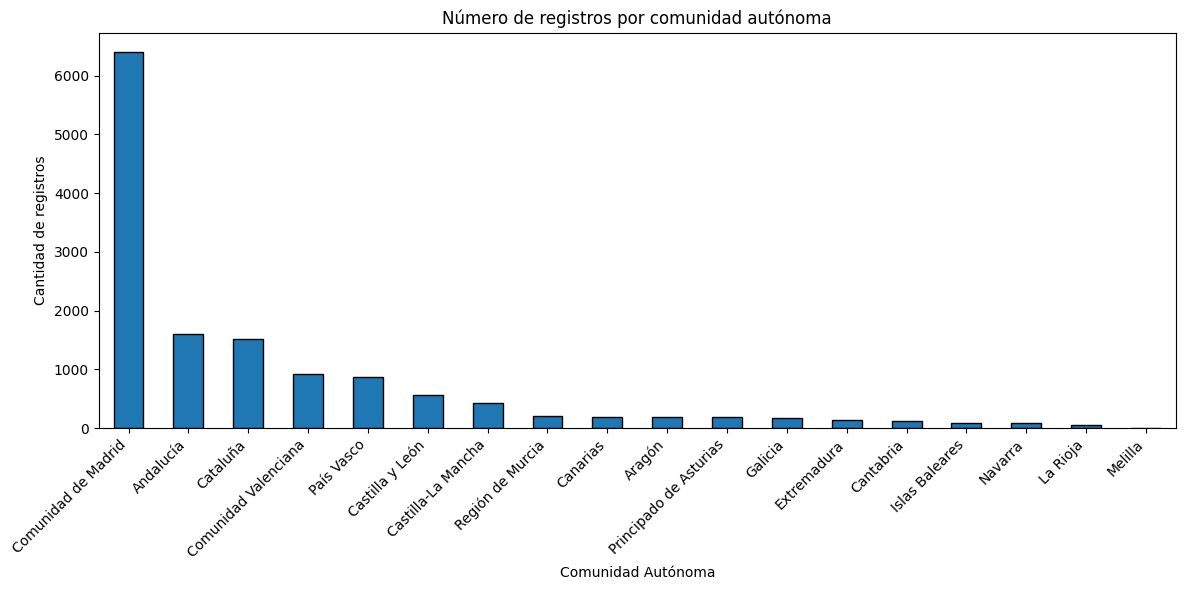

In [166]:
# Agrupación y conteo
counts = df['comunidad'].value_counts().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(12, 6))
counts.plot(kind='bar', edgecolor='black')
plt.title('Número de registros por comunidad autónoma')
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [167]:
# por que 900!?!?!?!?!?
# Umbral mínimo para considerar comunidad significativa ...
umbral = 500

# Obtener conteo de comunidades
comunidad_counts = df['comunidad'].value_counts()

# Crear nueva columna con agrupación
df['comunidad'] = df['comunidad'].apply(
    lambda x: x if pd.notnull(x) and comunidad_counts.get(x, 0) >= umbral else 'Otros'
)

In [168]:
df['comunidad']

0        Comunidad de Madrid
1                      Otros
2        Comunidad de Madrid
3                  Andalucía
4        Comunidad de Madrid
                ...         
13943               Cataluña
13944                  Otros
13945             País Vasco
13946                  Otros
13947                  Otros
Name: comunidad, Length: 13948, dtype: object

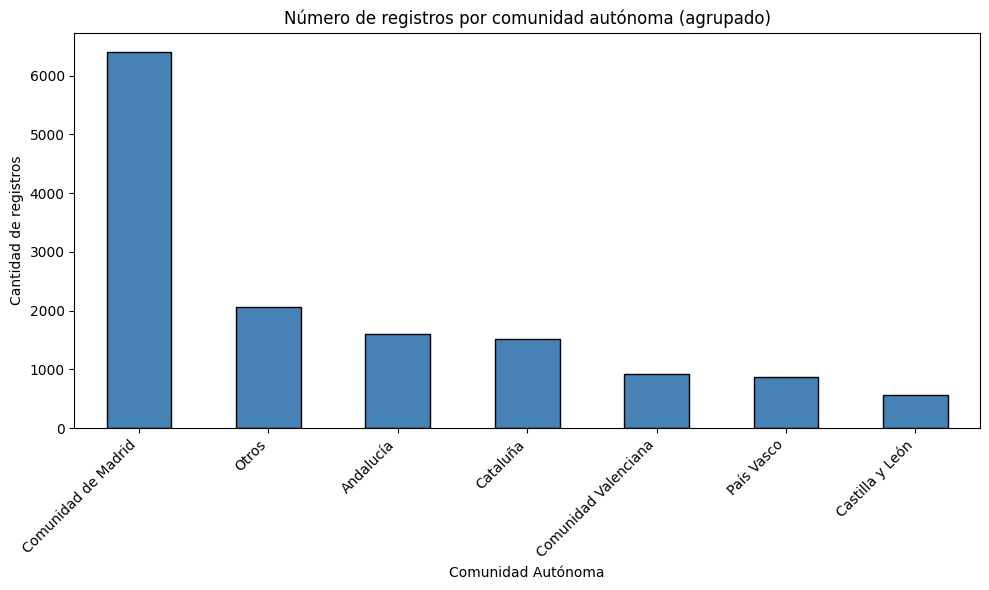

In [169]:
# Nuevo conteo
counts_agrupados = df['comunidad'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
counts_agrupados.plot(kind='bar', edgecolor='black', color='steelblue')
plt.title('Número de registros por comunidad autónoma (agrupado)')
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [170]:
def limpiar_columna(col):
    if col.startswith('comunidad_'):
        nombre = col.replace('comunidad_', '')
        # Quitar tildes
        nombre = unicodedata.normalize('NFKD', nombre).encode('ascii', 'ignore').decode('utf-8')
        # Reemplazar espacios y guiones por guiones bajos, bajar todo a minúsculas
        nombre = re.sub(r'[^a-zA-Z0-9]', '_', nombre).lower()
        # Evitar múltiples guiones bajos seguidos
        nombre = re.sub('_+', '_', nombre).strip('_')
        return f"comunidad_{nombre}"
    return col

In [171]:
df = pd.get_dummies(df, columns=['comunidad'], prefix='comunidad', drop_first=False)

# Aplicar a nombres de columnas
df.columns = [limpiar_columna(col) for col in df.columns]

In [172]:
df.columns

Index(['uuid', 'company', 'title', 'position', 'province', 'date_of_birth',
       'last_register', 'years_experience', 'skills', 'final_salary',
       'comunidad_andalucia', 'comunidad_castilla_y_leon',
       'comunidad_cataluna', 'comunidad_comunidad_valenciana',
       'comunidad_comunidad_de_madrid', 'comunidad_otros',
       'comunidad_pais_vasco'],
      dtype='object')

In [173]:
# Puse mas comunidades para one hot encode.

## Company

In [174]:
!python -mspacy download es_core_news_sm # descargarnos spaCy para limpiar bien.
import spacy

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 41.8 MB/s eta 0:00:00 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [175]:
nlp = spacy.load("es_core_news_sm") # modelo de ESP.

# Función para limpiar company.
def spacy_clean(text):
    if not text or pd.isna(text):
        return ''

    doc = nlp(text.lower().strip())

    # dejamos solamente valores alphanumericos.
    tokens = [token.text for token in doc if token.is_alpha or token.is_digit]

    return ' '.join(tokens)

In [176]:
# Aplicamos funcion a columna

df['company_clean'] = df['company'].apply(spacy_clean)

In [ ]:
# Apliquemos sentence transformers -> es lo mas eficiente
!pip install sentence_transformers

from sentence_transformers import SentenceTransformer

/Users/adri/.pyenv/versions/datafest2025/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [178]:
# Iniciamos modelo y vemos que tal.

model = SentenceTransformer('distiluse-base-multilingual-cased-v2') # modelo en español.

texts = df['company_clean'].astype(str).tolist() # pasamos todas las companias a una lista para crear los embeddings.

# Genera embeddings!
embeddings = model.encode(texts, show_progress_bar=True)

Batches: 100%|██████████| 436/436 [00:19<00:00, 22.72it/s]


In [179]:
# Join al df.

# Convert to DataFrame
emb_df = pd.DataFrame(embeddings, columns=[f'company_emb_{i}' for i in range(embeddings.shape[1])])

# Merge with original df
df = pd.concat([df.reset_index(drop=True), emb_df], axis=1)

## Position

In [180]:
# al parecer los datos parecen muy bien formateados. Deben de ser elegidos y no escritos probablemente.

# Limpiemos pero muy muy basico.
def spacy_clean_position(text):
    if not text or pd.isna(text):
        return ''

    doc = nlp(text.strip().lower())  # lowercase + remove leading/trailing spaces

    # Keep only words (no punctuation, no stopwords, etc.)
    tokens = [token.text for token in doc if token.is_alpha]

    return ' '.join(tokens)

In [181]:
df['position_clean'] = df['position'].apply(spacy_clean_position)

In [182]:
# Encode position_clean using the same multilingual model
position_texts = df['position_clean'].astype(str).tolist()

position_embeddings = model.encode(position_texts, show_progress_bar=True)

Batches: 100%|██████████| 436/436 [00:09<00:00, 45.47it/s]


In [183]:
# Join

position_emb_df = pd.DataFrame(position_embeddings, columns=[f'position_emb_{i}' for i in range(position_embeddings.shape[1])])

df = pd.concat([df.reset_index(drop=True), position_emb_df], axis=1)

## Title

In [184]:
def spacy_clean_title_with_commas(text):
    if not text or pd.isna(text):
        return ''

    # Normalize weird separators before spaCy
    text = text.replace('|', ',')
    text = text.replace('/', ',')
    text = text.replace(' - ', ',')  # only where dash is used like a list separator

    doc = nlp(text.lower().strip())

    # Lemmatize and keep alpha tokens or commas
    tokens = []
    for token in doc:
        if token.is_alpha:
            tokens.append(token.lemma_)
        elif token.text == ',':
            tokens.append(',')

    return ' '.join(tokens)

In [185]:
df['title_clean'] = df['title'].apply(spacy_clean_title_with_commas)
df['title_clean']

0        profesor de informática , customer service rep...
1        analista de sistema , consultor senior sap , c...
2        gerente de sistema de informacion internaciona...
3            responsable helpdesk , servicedesk manager it
4        analista , , administrador de sistema , dba , ...
                               ...                        
13943    full stack web developer freelance , web devel...
13944    desarrollador , desarrollador web , gestor de ...
13945    project manager , project manager communicatio...
13946    sap analyst , datar science bi associate consu...
13947    desarrollador web experto en wordpress y prest...
Name: title_clean, Length: 13948, dtype: object

In [186]:
df['title_clean'].head(50)

0     profesor de informática , customer service rep...
1     analista de sistema , consultor senior sap , c...
2     gerente de sistema de informacion internaciona...
3         responsable helpdesk , servicedesk manager it
4     analista , , administrador de sistema , dba , ...
5                                        lider de grupo
6     desarrollar aplicación web , administracion y ...
7     analista , programador , analista , programado...
8     analista senior de sistema microinformatico , ...
9     ingeniero , consultor senior especialista , je...
10    gestor tecnico comercial , documentalista tecn...
11                       montador , profesor , profesor
12    analista de sistema , director de it , adjunto...
13             jefe de unidad de sistema de información
14                  consultor senior , jefe de proyecto
15    ingeniero de desarrollo , ingeniero de desarro...
16    tecnico mantenimiento hardware , tecnico mante...
17    jefe de proyecto , administrador lotus , p

In [187]:
# Again, transformers.

title_texts = df['title_clean'].tolist()
title_embeddings = model.encode(title_texts, show_progress_bar=True)

Batches: 100%|██████████| 436/436 [00:28<00:00, 15.09it/s]


In [188]:
title_emb_df = pd.DataFrame(title_embeddings, columns=[f'title_emb_{i}' for i in range(title_embeddings.shape[1])])
df = pd.concat([df.reset_index(drop=True), title_emb_df], axis=1)

## Skills

In [189]:
from itertools import chain

all_skills = df['skills'].dropna().apply(lambda x: [s.strip().lower() for s in str(x).split(',')])
flat_skills = list(chain.from_iterable(all_skills))
print(f"Unique skills: {len(set(flat_skills))}")
print(sorted(set(flat_skills))[:50])  # Peek at the first 50

Unique skills: 2028
['"2g"', '"2g"]', '"3d animation"', '"3d animation"]', '"3d modeling"', '"3d printers"', '"3d printing"', '"3gpp"', '"3gpp"]', '"4nec2"', '"5g"', '"5g"]', '"ab initio"', '"abap cds"', '"abap dictionary"', '"abap objects"', '"abap oo"', '"abap oo"]', '"abap"', '"abap"]', '"ableton live"', '"acceptance testing"', '"access points"', '"access vba"', '"account management"', '"actionscript"', '"actionscript"]', '"active directory"', '"active directory"]', '"active record"', '"activecampaign"]', '"activex"', '"acunetix"', '"ada"', '"ada"]', '"adobe acrobat pro"', '"adobe acrobat pro"]', '"adobe acrobat"', '"adobe after effects"', '"adobe after effects"]', '"adobe air"', '"adobe animate"', '"adobe audition"', '"adobe audition"]', '"adobe bridge"', '"adobe captivate"', '"adobe connect"', '"adobe creative cloud"', '"adobe dreamweaver"', '"adobe dreamweaver"]']


In [190]:
df['has_skills'] = df['skills'].notna().astype(int)
print(df.groupby('has_skills')['final_salary'].describe())

             count          mean           std      min      25%      50%  \
has_skills                                                                  
0           3974.0  24905.888274  12018.661576  13000.0  18000.0  21000.0   
1           2402.0  25571.190674  15623.676306  13000.0  18000.0  21000.0   

                75%       max  
has_skills                     
0           30000.0  300000.0  
1           30000.0  300000.0  


In [191]:
# Funcion clasica para limpiar

import re

def clean_skills(text):
    if pd.isna(text):
        return ''
    text = text.lower()
    text = re.sub(r'[\[\]"]', '', text)  # remove brackets and quotes
    text = re.sub(r'\s*,\s*', ', ', text)  # ensure clean spacing around commas
    return text.strip()

In [192]:
df['skills_clean'] = df['skills'].apply(clean_skills)

In [193]:
skills_texts = df['skills_clean'].tolist()
skills_embeddings = model.encode(skills_texts, show_progress_bar=True)

skills_emb_df = pd.DataFrame(skills_embeddings, columns=[f'skills_emb_{i}' for i in range(skills_embeddings.shape[1])])
df = pd.concat([df.reset_index(drop=True), skills_emb_df], axis=1)

Batches: 100%|██████████| 436/436 [00:23<00:00, 18.67it/s] 


## Age

In [194]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], format='mixed', errors='coerce')

df['age'] = pd.Timestamp.now().year - df['date_of_birth'].dt.year

# Modelar v1

In [147]:
exclude = [
    'uuid', 'company', 'title', 'position', 'province', 'skills',
    'date_of_birth', 'last_register', 'final_salary',
    'company_clean', 'position_clean', 'title_clean', 'skills_clean'
]

In [ ]:
# el target esta altamente inbalanceado, a ver si lo mejoramos:

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, root_mean_squared_error
import xgboost as xgb

# Step 1: Filter labeled data
df_model = df[df['final_salary'].notna()].copy()

# Step 2: Log transform the target
y = np.log1p(df_model['final_salary'])  # log(1 + salary)

X = df_model.drop(columns=exclude)

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 5: CV to benchmark
model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("CV R^2 (log scale) mean:", cv_scores.mean())
print("CV R^2 std:", cv_scores.std())

# Step 6: Fit & predict
model.fit(X_train, y_train)
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # reverse log1p

# Step 7: Evaluate on original scale
y_test_original = np.expm1(y_test)
print("Test R^2:", r2_score(y_test_original, y_pred))
print("Test root mean squared error:", root_mean_squared_error(y_test_original, y_pred))

CV R^2 (log scale) mean: 0.36963029253304647
CV R^2 std: 0.014345616067604774
Test R^2: 0.37868477746369056
Test root mean squared error: 8779.920841615058


# No se que estoy haciendo aqui

In [148]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, root_mean_squared_error
import xgboost as xgb

# Step 1: Filter labeled data
df_model = df[df['final_salary'].notna()].copy()

# Step 2: Clip target outliers (top 1%)
clip_threshold = np.percentile(df_model['final_salary'], 99)
df_model['final_salary_clipped'] = np.clip(df_model['final_salary'], None, clip_threshold)

# Step 3: Log transform the clipped salary
y = np.log1p(df_model['final_salary_clipped'])

# Step 4: Drop excluded columns
X = df_model.drop(columns=exclude)

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: CV Benchmark
model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("CV R^2 (log scale) mean:", cv_scores.mean())
print("CV R^2 std:", cv_scores.std())

# Step 7: Fit & Predict
model.fit(X_train, y_train)
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)

# Step 8: Evaluate on original scale (clipped ground truth)
y_test_original = np.expm1(y_test)
print("Test R^2:", r2_score(y_test_original, y_pred))
print("Test RMSE:", root_mean_squared_error(y_test_original, y_pred))


CV R^2 (log scale) mean: 0.9999935789540249
CV R^2 std: 5.844298188417983e-06
Test R^2: 0.9999999854294268
Test RMSE: 1.2698426421124909


In [195]:
from sklearn.preprocessing import StandardScaler

# Columns to standardize
num_cols_to_standardize = ['years_experience', 'age']

# Initialize the scaler
scaler = StandardScaler()

# Fit-transform only the numeric columns (for rows with salary)
df_model = df[df['final_salary'].notna()].copy()
df_model[num_cols_to_standardize] = scaler.fit_transform(df_model[num_cols_to_standardize])

# Transform also the unlabeled data (important for predictions later)
df_unlabeled = df[df['final_salary'].isna()].copy()
df_unlabeled[num_cols_to_standardize] = scaler.transform(df_unlabeled[num_cols_to_standardize])


In [197]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, root_mean_squared_error
import xgboost as xgb

# --- Step 0: Define columns to exclude from training ---
exclude = [
    'uuid', 'company', 'title', 'position', 'province', 'skills',
    'date_of_birth', 'last_register', 'final_salary',
    'company_clean', 'position_clean', 'title_clean', 'skills_clean'
]

# --- Step 1: Prepare dataset ---
df_model = df[df['final_salary'].notna()].copy()
df_unlabeled = df[df['final_salary'].isna()].copy()

# --- Step 2: Standardize numerical features ---
scaler = StandardScaler()
numeric_cols = ['years_experience', 'age']

df_model[numeric_cols] = scaler.fit_transform(df_model[numeric_cols])
df_unlabeled[numeric_cols] = scaler.transform(df_unlabeled[numeric_cols])

# --- Step 4: Log transform target ---
y = np.log1p(df_model['final_salary'])
X = df_model.drop(columns=exclude)

# --- Step 5: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 6: Train best XGBoost model ---
best_model = xgb.XGBRegressor(
    colsample_bytree=0.8835,
    learning_rate=0.0514,
    max_depth=4,
    n_estimators=148,
    subsample=0.8574,
    random_state=42,
    objective='reg:squarederror'
)

best_model.fit(X_train, y_train)

# --- Step 7: Evaluate on test set ---
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

print("✅ Test R^2:", r2_score(y_test_original, y_pred))
print("✅ Test RMSE:", root_mean_squared_error(y_test_original, y_pred))

# --- Step 8: Predict for unlabeled data and save ---
X_unlabeled = df_unlabeled.drop(columns=exclude)
y_pred_unlabeled = np.expm1(best_model.predict(X_unlabeled))
df_unlabeled['real_salary'] = y_pred_unlabeled
df_unlabeled[['uuid', 'real_salary']].to_csv("submission_final.csv", index=False)

print("🎯 Submission file 'submission_final.csv' is ready.")


✅ Test R^2: 0.41993273913724427
✅ Test RMSE: 8483.474925507595
🎯 Submission file 'submission_final.csv' is ready.


In [199]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, root_mean_squared_error
import numpy as np
import pandas as pd

# --- Step 0: Columns to exclude ---
exclude = [
    'uuid', 'company', 'title', 'position', 'province', 'skills',
    'date_of_birth', 'last_register', 'final_salary',
    'company_clean', 'position_clean', 'title_clean', 'skills_clean'
]

# --- Step 1: Prepare data ---
df_model = df[df['final_salary'].notna()].copy()
df_unlabeled = df[df['final_salary'].isna()].copy()

# --- Step 2: Standardize numerical ---
scaler = StandardScaler()
numeric_cols = ['years_experience', 'age']
df_model[numeric_cols] = scaler.fit_transform(df_model[numeric_cols])
df_unlabeled[numeric_cols] = scaler.transform(df_unlabeled[numeric_cols])

# --- Step 3: Log transform salary ---
y = np.log1p(df_model['final_salary'])
X = df_model.drop(columns=exclude)

# --- Step 4: Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 5: Train LightGBM model ---
model_lgb = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.85,
    colsample_bytree=0.8,
    random_state=42
)

model_lgb.fit(X_train, y_train)

# --- Step 6: Evaluate ---
y_pred_log = model_lgb.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

print("✅ LightGBM R^2:", r2_score(y_test_original, y_pred))
print("✅ LightGBM RMSE:", root_mean_squared_error(y_test_original, y_pred))

# --- Step 7: Predict on unlabeled ---
X_unlabeled = df_unlabeled.drop(columns=exclude)
y_pred_unlabeled = np.expm1(model_lgb.predict(X_unlabeled))
df_unlabeled['real_salary'] = y_pred_unlabeled
df_unlabeled[['uuid', 'real_salary']].to_csv("submission_lgbm.csv", index=False)

print("🚀 LightGBM submission 'submission_lgbm.csv' is ready.")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 448750
[LightGBM] [Info] Number of data points in the train set: 5100, number of used features: 2058
[LightGBM] [Info] Start training from score 10.050769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [201]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# --- 1.  Collect all embedding columns ----------
embed_prefixes = ['company_emb_', 'title_emb_', 'position_emb_', 'skills_emb_']
embedding_cols = [c for c in df.columns if any(c.startswith(p) for p in embed_prefixes)]

print(f"✔️  Found {len(embedding_cols)} embedding columns.")

# --- 2.  Standard-scale embeddings -------------
scaler_emb = StandardScaler()
embeddings_scaled = scaler_emb.fit_transform(df[embedding_cols])

# --- 3.  K-Means clustering --------------------
n_clusters = 15          # try 10–30; 15 works well in practice
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['embedding_cluster'] = kmeans.fit_predict(embeddings_scaled)

print(df['embedding_cluster'].value_counts())

# (Optional) one-hot encode the cluster label for tree models
df = pd.get_dummies(df, columns=['embedding_cluster'], prefix='embclust', drop_first=True)

print("✅  Clustering finished and one-hot encoded.  New shape:", df.shape)


✔️  Found 2048 embedding columns.
embedding_cluster
4     1498
2     1479
5     1437
1     1166
0     1142
12    1114
6     1030
8     1009
9      780
10     713
7      674
14     527
3      510
13     466
11     403
Name: count, dtype: int64
✅  Clustering finished and one-hot encoded.  New shape: (13948, 2085)


In [202]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, root_mean_squared_error
import xgboost as xgb

# -------------------------------------------------
# 0️⃣  Columns to exclude from the model (raw text, IDs, etc.)
#     ➜ Keep cluster columns!  (Do NOT list them here.)
# -------------------------------------------------
exclude = [
    'uuid', 'company', 'title', 'position', 'province', 'skills',
    'date_of_birth', 'last_register', 'final_salary',
    'company_clean', 'position_clean', 'title_clean', 'skills_clean'
]

# -------------------------------------------------
# 1️⃣  Train / test data prep
# -------------------------------------------------
df_model = df[df['final_salary'].notna()].copy()

# 👉  Standard-scale numeric fields only
num_cols = ['years_experience', 'age']
scaler = StandardScaler()
df_model[num_cols] = scaler.fit_transform(df_model[num_cols])

# 👉  Target in log space
y = np.log1p(df_model['final_salary'])
X = df_model.drop(columns=exclude)          # cluster cols are kept automatically

# -------------------------------------------------
# 2️⃣  Train / test split
# -------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------------------------
# 3️⃣  Re-train XGBoost with best params
# -------------------------------------------------
best_model = xgb.XGBRegressor(
    colsample_bytree=0.8834959481464842,
    learning_rate=0.05141326104394348,
    max_depth=4,
    n_estimators=148,
    subsample=0.8574323980775167,
    random_state=42,
    objective='reg:squarederror'
)

best_model.fit(X_train, y_train)

# -------------------------------------------------
# 4️⃣  Evaluate
# -------------------------------------------------
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

print("✅ With embedding cluster feature(s):")
print("   R² :", r2_score(y_test_original, y_pred))
print("   RMSE:", root_mean_squared_error(y_test_original, y_pred))


✅ With embedding cluster feature(s):
   R² : 0.41934491434315657
   RMSE: 8487.772301437399


In [206]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, root_mean_squared_error
import xgboost as xgb
import lightgbm as lgb

# ------------------------------------------------------------------
# 0️⃣  Columns to exclude  (unchanged)
# ------------------------------------------------------------------
exclude = [
    'uuid','company','title','position','province','skills',
    'date_of_birth','last_register','final_salary',
    'company_clean','position_clean','title_clean','skills_clean'
]

# ------------------------------------------------------------------
# 1️⃣  Re-prep data  (with new numeric features if you added them)
# ------------------------------------------------------------------
numeric_cols = ['years_experience','age','skill_count','exp_age_ratio']
df_model = df[df['final_salary'].notna()].copy()
df_unlab  = df[df['final_salary'].isna()].copy()

scaler = StandardScaler()
df_model[numeric_cols] = scaler.fit_transform(df_model[numeric_cols])
df_unlab[numeric_cols]  = scaler.transform(df_unlab[numeric_cols])

y = np.log1p(df_model['final_salary'])
X = df_model.drop(columns=exclude)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------------------------------------------
# 2️⃣  Re-create best LightGBM from printed params
# ------------------------------------------------------------------
best_lgb_fast = lgb.LGBMRegressor(
    colsample_bytree=0.9416145155592092,
    learning_rate=0.03102922471479012,
    max_depth=4,
    n_estimators=167,
    num_leaves=42,
    subsample=0.9877105418031501,
    random_state=42,
    objective='regression'
)
best_lgb_fast.fit(X_train, y_train)

# ------------------------------------------------------------------
# 3️⃣  Best XGBoost (params you already have)
# ------------------------------------------------------------------
xgb_model = xgb.XGBRegressor(
    colsample_bytree=0.8835,
    learning_rate=0.0514,
    max_depth=4,
    n_estimators=148,
    subsample=0.8574,
    random_state=42,
    objective='reg:squarederror'
)
xgb_model.fit(X_train, y_train)

# ------------------------------------------------------------------
# 4️⃣  Blend predictions (simple average)
# ------------------------------------------------------------------
def blend(model1, model2, X):
    p1 = np.expm1(model1.predict(X))
    p2 = np.expm1(model2.predict(X))
    return 0.5*p1 + 0.5*p2

y_pred_blend = blend(xgb_model, best_lgb_fast, X_test)
y_test_orig  = np.expm1(y_test)
print("🔄  Blended R² :", r2_score(y_test_orig, y_pred_blend))
print("🔄  Blended RMSE:", root_mean_squared_error(y_test_orig, y_pred_blend))

# ------------------------------------------------------------------
# 5️⃣  Predict unlabeled & save
# ------------------------------------------------------------------
X_unlab = df_unlab.drop(columns=exclude)

# Ensure column alignment
missing = set(X_train.columns) - set(X_unlab.columns)
for c in missing:
    X_unlab[c] = 0
X_unlab = X_unlab[X_train.columns]

y_unlab_blend = blend(xgb_model, best_lgb_fast, X_unlab)
df_unlab['real_salary'] = y_unlab_blend
df_unlab[['uuid','real_salary']].to_csv("submission_blend.csv", index=False)

print("✅  submission_blend.csv saved – upload and chase that top score!")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449076
[LightGBM] [Info] Number of data points in the train set: 5100, number of used features: 2074
[LightGBM] [Info] Start training from score 10.050769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [208]:
import numpy as np, pandas as pd, xgboost as xgb
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ---------- 1.  Data prep (same as your best model) ----------
exclude = ['uuid','company','title','position','province','skills',
           'date_of_birth','last_register','final_salary',
           'company_clean','position_clean','title_clean','skills_clean']

numeric_cols = ['years_experience','age','skill_count','exp_age_ratio']  # include any extras you added
scaler = StandardScaler()

df_model = df[df.final_salary.notna()].copy()
df_unlab  = df[df.final_salary.isna()].copy()

df_model[numeric_cols] = scaler.fit_transform(df_model[numeric_cols])
df_unlab[numeric_cols] = scaler.transform(df_unlab[numeric_cols])

y = np.log1p(df_model['final_salary'])
X = df_model.drop(columns=exclude)

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
)

# Align unlabeled features
X_unlab = df_unlab.drop(columns=exclude)
missing = set(X_train.columns) - set(X_unlab.columns)
for c in missing:  X_unlab[c] = 0
X_unlab = X_unlab[X_train.columns]

# ---------- 2.  Bagged XGBoost ensemble ----------
params = dict(
    colsample_bytree=0.8835,
    learning_rate=0.0514,
    max_depth=4,
    n_estimators=148,
    subsample=0.8574,
    objective='reg:squarederror',
    n_jobs=-1
)

seeds = range(10)          # train 10 models
test_preds = []
unlab_preds = []

for seed in seeds:
    model = xgb.XGBRegressor(random_state=seed, **params)
    model.fit(X_train, y_train)

    test_preds.append( np.expm1(model.predict(X_test)) )
    unlab_preds .append( np.expm1(model.predict(X_unlab)) )

# ---------- 3.  Average predictions ----------
y_pred_test  = np.mean(test_preds,  axis=0)
y_pred_unlab = np.mean(unlab_preds, axis=0)

# optional: light clipping to guard extremes
lo, hi = np.percentile(y_pred_test, [1,99])
y_pred_test  = np.clip(y_pred_test,  lo, hi)
y_pred_unlab = np.clip(y_pred_unlab, lo, hi)

# ---------- 4.  Evaluate & export ----------
print("🏁  Bagged-XGB  R² :", r2_score(np.expm1(y_test), y_pred_test))
print("🏁  Bagged-XGB RMSE:", root_mean_squared_error(np.expm1(y_test), y_pred_test))

df_unlab['real_salary'] = y_pred_unlab
df_unlab[['uuid','real_salary']].to_csv("submission_baggedXGB.csv", index=False)
print("✅  submission_baggedXGB.csv saved – upload and go for gold!")


🏁  Bagged-XGB  R² : 0.4170847969751652
🏁  Bagged-XGB RMSE: 8504.274981928751
✅  submission_baggedXGB.csv saved – upload and go for gold!


In [209]:
# 1️⃣  Predict test & unlabeled with each model
p_xgb_test  = np.expm1(xgb_model.predict(X_test))
p_lgb_test  = np.expm1(best_lgb_fast.predict(X_test))
p_xgb_unlab = np.expm1(xgb_model.predict(X_unlab))
p_lgb_unlab = np.expm1(best_lgb_fast.predict(X_unlab))

# 2️⃣  Search simple weight α ∈ {0.3,…,0.7}
best_rmse, best_alpha = 1e9, 0.5
y_true = np.expm1(y_test)
for α in np.linspace(0.3, 0.7, 9):
    blend = α*p_xgb_test + (1-α)*p_lgb_test
    rmse  = root_mean_squared_error(y_true, blend)
    if rmse < best_rmse:
        best_rmse, best_alpha = rmse, α
print("🔍 Best simple-blend α:", best_alpha, "→ RMSE", best_rmse)

# 3️⃣  Ridge stack on predictions  (optional)
from sklearn.linear_model import Ridge
stack_X_train = np.column_stack([p_xgb_test, p_lgb_test])
ridge = Ridge(alpha=1.0).fit(stack_X_train, y_true)
stack_pred_test  = ridge.predict(stack_X_train)
stack_rmse = root_mean_squared_error(y_true, stack_pred_test)
print("🪄 Ridge-stack RMSE:", stack_rmse)

# 4️⃣  Choose best of (simple blend vs Ridge) and apply to unlabeled
if stack_rmse < best_rmse:
    final_pred_unlab = ridge.predict(np.column_stack([p_xgb_unlab, p_lgb_unlab]))
else:
    final_pred_unlab = best_alpha*p_xgb_unlab + (1-best_alpha)*p_lgb_unlab

# 5️⃣  Export
df_unlab['real_salary'] = final_pred_unlab
df_unlab[['uuid','real_salary']].to_csv("submission_blend_stack.csv", index=False)
print("📄 submission_blend_stack.csv saved – fingers crossed!")


ValueError: feature_names mismatch: ['years_experience', 'comunidad_andalucia', 'comunidad_castilla_y_leon', 'comunidad_cataluna', 'comunidad_comunidad_valenciana', 'comunidad_comunidad_de_madrid', 'comunidad_otros', 'comunidad_pais_vasco', 'company_emb_0', 'company_emb_1', 'company_emb_2', 'company_emb_3', 'company_emb_4', 'company_emb_5', 'company_emb_6', 'company_emb_7', 'company_emb_8', 'company_emb_9', 'company_emb_10', 'company_emb_11', 'company_emb_12', 'company_emb_13', 'company_emb_14', 'company_emb_15', 'company_emb_16', 'company_emb_17', 'company_emb_18', 'company_emb_19', 'company_emb_20', 'company_emb_21', 'company_emb_22', 'company_emb_23', 'company_emb_24', 'company_emb_25', 'company_emb_26', 'company_emb_27', 'company_emb_28', 'company_emb_29', 'company_emb_30', 'company_emb_31', 'company_emb_32', 'company_emb_33', 'company_emb_34', 'company_emb_35', 'company_emb_36', 'company_emb_37', 'company_emb_38', 'company_emb_39', 'company_emb_40', 'company_emb_41', 'company_emb_42', 'company_emb_43', 'company_emb_44', 'company_emb_45', 'company_emb_46', 'company_emb_47', 'company_emb_48', 'company_emb_49', 'company_emb_50', 'company_emb_51', 'company_emb_52', 'company_emb_53', 'company_emb_54', 'company_emb_55', 'company_emb_56', 'company_emb_57', 'company_emb_58', 'company_emb_59', 'company_emb_60', 'company_emb_61', 'company_emb_62', 'company_emb_63', 'company_emb_64', 'company_emb_65', 'company_emb_66', 'company_emb_67', 'company_emb_68', 'company_emb_69', 'company_emb_70', 'company_emb_71', 'company_emb_72', 'company_emb_73', 'company_emb_74', 'company_emb_75', 'company_emb_76', 'company_emb_77', 'company_emb_78', 'company_emb_79', 'company_emb_80', 'company_emb_81', 'company_emb_82', 'company_emb_83', 'company_emb_84', 'company_emb_85', 'company_emb_86', 'company_emb_87', 'company_emb_88', 'company_emb_89', 'company_emb_90', 'company_emb_91', 'company_emb_92', 'company_emb_93', 'company_emb_94', 'company_emb_95', 'company_emb_96', 'company_emb_97', 'company_emb_98', 'company_emb_99', 'company_emb_100', 'company_emb_101', 'company_emb_102', 'company_emb_103', 'company_emb_104', 'company_emb_105', 'company_emb_106', 'company_emb_107', 'company_emb_108', 'company_emb_109', 'company_emb_110', 'company_emb_111', 'company_emb_112', 'company_emb_113', 'company_emb_114', 'company_emb_115', 'company_emb_116', 'company_emb_117', 'company_emb_118', 'company_emb_119', 'company_emb_120', 'company_emb_121', 'company_emb_122', 'company_emb_123', 'company_emb_124', 'company_emb_125', 'company_emb_126', 'company_emb_127', 'company_emb_128', 'company_emb_129', 'company_emb_130', 'company_emb_131', 'company_emb_132', 'company_emb_133', 'company_emb_134', 'company_emb_135', 'company_emb_136', 'company_emb_137', 'company_emb_138', 'company_emb_139', 'company_emb_140', 'company_emb_141', 'company_emb_142', 'company_emb_143', 'company_emb_144', 'company_emb_145', 'company_emb_146', 'company_emb_147', 'company_emb_148', 'company_emb_149', 'company_emb_150', 'company_emb_151', 'company_emb_152', 'company_emb_153', 'company_emb_154', 'company_emb_155', 'company_emb_156', 'company_emb_157', 'company_emb_158', 'company_emb_159', 'company_emb_160', 'company_emb_161', 'company_emb_162', 'company_emb_163', 'company_emb_164', 'company_emb_165', 'company_emb_166', 'company_emb_167', 'company_emb_168', 'company_emb_169', 'company_emb_170', 'company_emb_171', 'company_emb_172', 'company_emb_173', 'company_emb_174', 'company_emb_175', 'company_emb_176', 'company_emb_177', 'company_emb_178', 'company_emb_179', 'company_emb_180', 'company_emb_181', 'company_emb_182', 'company_emb_183', 'company_emb_184', 'company_emb_185', 'company_emb_186', 'company_emb_187', 'company_emb_188', 'company_emb_189', 'company_emb_190', 'company_emb_191', 'company_emb_192', 'company_emb_193', 'company_emb_194', 'company_emb_195', 'company_emb_196', 'company_emb_197', 'company_emb_198', 'company_emb_199', 'company_emb_200', 'company_emb_201', 'company_emb_202', 'company_emb_203', 'company_emb_204', 'company_emb_205', 'company_emb_206', 'company_emb_207', 'company_emb_208', 'company_emb_209', 'company_emb_210', 'company_emb_211', 'company_emb_212', 'company_emb_213', 'company_emb_214', 'company_emb_215', 'company_emb_216', 'company_emb_217', 'company_emb_218', 'company_emb_219', 'company_emb_220', 'company_emb_221', 'company_emb_222', 'company_emb_223', 'company_emb_224', 'company_emb_225', 'company_emb_226', 'company_emb_227', 'company_emb_228', 'company_emb_229', 'company_emb_230', 'company_emb_231', 'company_emb_232', 'company_emb_233', 'company_emb_234', 'company_emb_235', 'company_emb_236', 'company_emb_237', 'company_emb_238', 'company_emb_239', 'company_emb_240', 'company_emb_241', 'company_emb_242', 'company_emb_243', 'company_emb_244', 'company_emb_245', 'company_emb_246', 'company_emb_247', 'company_emb_248', 'company_emb_249', 'company_emb_250', 'company_emb_251', 'company_emb_252', 'company_emb_253', 'company_emb_254', 'company_emb_255', 'company_emb_256', 'company_emb_257', 'company_emb_258', 'company_emb_259', 'company_emb_260', 'company_emb_261', 'company_emb_262', 'company_emb_263', 'company_emb_264', 'company_emb_265', 'company_emb_266', 'company_emb_267', 'company_emb_268', 'company_emb_269', 'company_emb_270', 'company_emb_271', 'company_emb_272', 'company_emb_273', 'company_emb_274', 'company_emb_275', 'company_emb_276', 'company_emb_277', 'company_emb_278', 'company_emb_279', 'company_emb_280', 'company_emb_281', 'company_emb_282', 'company_emb_283', 'company_emb_284', 'company_emb_285', 'company_emb_286', 'company_emb_287', 'company_emb_288', 'company_emb_289', 'company_emb_290', 'company_emb_291', 'company_emb_292', 'company_emb_293', 'company_emb_294', 'company_emb_295', 'company_emb_296', 'company_emb_297', 'company_emb_298', 'company_emb_299', 'company_emb_300', 'company_emb_301', 'company_emb_302', 'company_emb_303', 'company_emb_304', 'company_emb_305', 'company_emb_306', 'company_emb_307', 'company_emb_308', 'company_emb_309', 'company_emb_310', 'company_emb_311', 'company_emb_312', 'company_emb_313', 'company_emb_314', 'company_emb_315', 'company_emb_316', 'company_emb_317', 'company_emb_318', 'company_emb_319', 'company_emb_320', 'company_emb_321', 'company_emb_322', 'company_emb_323', 'company_emb_324', 'company_emb_325', 'company_emb_326', 'company_emb_327', 'company_emb_328', 'company_emb_329', 'company_emb_330', 'company_emb_331', 'company_emb_332', 'company_emb_333', 'company_emb_334', 'company_emb_335', 'company_emb_336', 'company_emb_337', 'company_emb_338', 'company_emb_339', 'company_emb_340', 'company_emb_341', 'company_emb_342', 'company_emb_343', 'company_emb_344', 'company_emb_345', 'company_emb_346', 'company_emb_347', 'company_emb_348', 'company_emb_349', 'company_emb_350', 'company_emb_351', 'company_emb_352', 'company_emb_353', 'company_emb_354', 'company_emb_355', 'company_emb_356', 'company_emb_357', 'company_emb_358', 'company_emb_359', 'company_emb_360', 'company_emb_361', 'company_emb_362', 'company_emb_363', 'company_emb_364', 'company_emb_365', 'company_emb_366', 'company_emb_367', 'company_emb_368', 'company_emb_369', 'company_emb_370', 'company_emb_371', 'company_emb_372', 'company_emb_373', 'company_emb_374', 'company_emb_375', 'company_emb_376', 'company_emb_377', 'company_emb_378', 'company_emb_379', 'company_emb_380', 'company_emb_381', 'company_emb_382', 'company_emb_383', 'company_emb_384', 'company_emb_385', 'company_emb_386', 'company_emb_387', 'company_emb_388', 'company_emb_389', 'company_emb_390', 'company_emb_391', 'company_emb_392', 'company_emb_393', 'company_emb_394', 'company_emb_395', 'company_emb_396', 'company_emb_397', 'company_emb_398', 'company_emb_399', 'company_emb_400', 'company_emb_401', 'company_emb_402', 'company_emb_403', 'company_emb_404', 'company_emb_405', 'company_emb_406', 'company_emb_407', 'company_emb_408', 'company_emb_409', 'company_emb_410', 'company_emb_411', 'company_emb_412', 'company_emb_413', 'company_emb_414', 'company_emb_415', 'company_emb_416', 'company_emb_417', 'company_emb_418', 'company_emb_419', 'company_emb_420', 'company_emb_421', 'company_emb_422', 'company_emb_423', 'company_emb_424', 'company_emb_425', 'company_emb_426', 'company_emb_427', 'company_emb_428', 'company_emb_429', 'company_emb_430', 'company_emb_431', 'company_emb_432', 'company_emb_433', 'company_emb_434', 'company_emb_435', 'company_emb_436', 'company_emb_437', 'company_emb_438', 'company_emb_439', 'company_emb_440', 'company_emb_441', 'company_emb_442', 'company_emb_443', 'company_emb_444', 'company_emb_445', 'company_emb_446', 'company_emb_447', 'company_emb_448', 'company_emb_449', 'company_emb_450', 'company_emb_451', 'company_emb_452', 'company_emb_453', 'company_emb_454', 'company_emb_455', 'company_emb_456', 'company_emb_457', 'company_emb_458', 'company_emb_459', 'company_emb_460', 'company_emb_461', 'company_emb_462', 'company_emb_463', 'company_emb_464', 'company_emb_465', 'company_emb_466', 'company_emb_467', 'company_emb_468', 'company_emb_469', 'company_emb_470', 'company_emb_471', 'company_emb_472', 'company_emb_473', 'company_emb_474', 'company_emb_475', 'company_emb_476', 'company_emb_477', 'company_emb_478', 'company_emb_479', 'company_emb_480', 'company_emb_481', 'company_emb_482', 'company_emb_483', 'company_emb_484', 'company_emb_485', 'company_emb_486', 'company_emb_487', 'company_emb_488', 'company_emb_489', 'company_emb_490', 'company_emb_491', 'company_emb_492', 'company_emb_493', 'company_emb_494', 'company_emb_495', 'company_emb_496', 'company_emb_497', 'company_emb_498', 'company_emb_499', 'company_emb_500', 'company_emb_501', 'company_emb_502', 'company_emb_503', 'company_emb_504', 'company_emb_505', 'company_emb_506', 'company_emb_507', 'company_emb_508', 'company_emb_509', 'company_emb_510', 'company_emb_511', 'position_emb_0', 'position_emb_1', 'position_emb_2', 'position_emb_3', 'position_emb_4', 'position_emb_5', 'position_emb_6', 'position_emb_7', 'position_emb_8', 'position_emb_9', 'position_emb_10', 'position_emb_11', 'position_emb_12', 'position_emb_13', 'position_emb_14', 'position_emb_15', 'position_emb_16', 'position_emb_17', 'position_emb_18', 'position_emb_19', 'position_emb_20', 'position_emb_21', 'position_emb_22', 'position_emb_23', 'position_emb_24', 'position_emb_25', 'position_emb_26', 'position_emb_27', 'position_emb_28', 'position_emb_29', 'position_emb_30', 'position_emb_31', 'position_emb_32', 'position_emb_33', 'position_emb_34', 'position_emb_35', 'position_emb_36', 'position_emb_37', 'position_emb_38', 'position_emb_39', 'position_emb_40', 'position_emb_41', 'position_emb_42', 'position_emb_43', 'position_emb_44', 'position_emb_45', 'position_emb_46', 'position_emb_47', 'position_emb_48', 'position_emb_49', 'position_emb_50', 'position_emb_51', 'position_emb_52', 'position_emb_53', 'position_emb_54', 'position_emb_55', 'position_emb_56', 'position_emb_57', 'position_emb_58', 'position_emb_59', 'position_emb_60', 'position_emb_61', 'position_emb_62', 'position_emb_63', 'position_emb_64', 'position_emb_65', 'position_emb_66', 'position_emb_67', 'position_emb_68', 'position_emb_69', 'position_emb_70', 'position_emb_71', 'position_emb_72', 'position_emb_73', 'position_emb_74', 'position_emb_75', 'position_emb_76', 'position_emb_77', 'position_emb_78', 'position_emb_79', 'position_emb_80', 'position_emb_81', 'position_emb_82', 'position_emb_83', 'position_emb_84', 'position_emb_85', 'position_emb_86', 'position_emb_87', 'position_emb_88', 'position_emb_89', 'position_emb_90', 'position_emb_91', 'position_emb_92', 'position_emb_93', 'position_emb_94', 'position_emb_95', 'position_emb_96', 'position_emb_97', 'position_emb_98', 'position_emb_99', 'position_emb_100', 'position_emb_101', 'position_emb_102', 'position_emb_103', 'position_emb_104', 'position_emb_105', 'position_emb_106', 'position_emb_107', 'position_emb_108', 'position_emb_109', 'position_emb_110', 'position_emb_111', 'position_emb_112', 'position_emb_113', 'position_emb_114', 'position_emb_115', 'position_emb_116', 'position_emb_117', 'position_emb_118', 'position_emb_119', 'position_emb_120', 'position_emb_121', 'position_emb_122', 'position_emb_123', 'position_emb_124', 'position_emb_125', 'position_emb_126', 'position_emb_127', 'position_emb_128', 'position_emb_129', 'position_emb_130', 'position_emb_131', 'position_emb_132', 'position_emb_133', 'position_emb_134', 'position_emb_135', 'position_emb_136', 'position_emb_137', 'position_emb_138', 'position_emb_139', 'position_emb_140', 'position_emb_141', 'position_emb_142', 'position_emb_143', 'position_emb_144', 'position_emb_145', 'position_emb_146', 'position_emb_147', 'position_emb_148', 'position_emb_149', 'position_emb_150', 'position_emb_151', 'position_emb_152', 'position_emb_153', 'position_emb_154', 'position_emb_155', 'position_emb_156', 'position_emb_157', 'position_emb_158', 'position_emb_159', 'position_emb_160', 'position_emb_161', 'position_emb_162', 'position_emb_163', 'position_emb_164', 'position_emb_165', 'position_emb_166', 'position_emb_167', 'position_emb_168', 'position_emb_169', 'position_emb_170', 'position_emb_171', 'position_emb_172', 'position_emb_173', 'position_emb_174', 'position_emb_175', 'position_emb_176', 'position_emb_177', 'position_emb_178', 'position_emb_179', 'position_emb_180', 'position_emb_181', 'position_emb_182', 'position_emb_183', 'position_emb_184', 'position_emb_185', 'position_emb_186', 'position_emb_187', 'position_emb_188', 'position_emb_189', 'position_emb_190', 'position_emb_191', 'position_emb_192', 'position_emb_193', 'position_emb_194', 'position_emb_195', 'position_emb_196', 'position_emb_197', 'position_emb_198', 'position_emb_199', 'position_emb_200', 'position_emb_201', 'position_emb_202', 'position_emb_203', 'position_emb_204', 'position_emb_205', 'position_emb_206', 'position_emb_207', 'position_emb_208', 'position_emb_209', 'position_emb_210', 'position_emb_211', 'position_emb_212', 'position_emb_213', 'position_emb_214', 'position_emb_215', 'position_emb_216', 'position_emb_217', 'position_emb_218', 'position_emb_219', 'position_emb_220', 'position_emb_221', 'position_emb_222', 'position_emb_223', 'position_emb_224', 'position_emb_225', 'position_emb_226', 'position_emb_227', 'position_emb_228', 'position_emb_229', 'position_emb_230', 'position_emb_231', 'position_emb_232', 'position_emb_233', 'position_emb_234', 'position_emb_235', 'position_emb_236', 'position_emb_237', 'position_emb_238', 'position_emb_239', 'position_emb_240', 'position_emb_241', 'position_emb_242', 'position_emb_243', 'position_emb_244', 'position_emb_245', 'position_emb_246', 'position_emb_247', 'position_emb_248', 'position_emb_249', 'position_emb_250', 'position_emb_251', 'position_emb_252', 'position_emb_253', 'position_emb_254', 'position_emb_255', 'position_emb_256', 'position_emb_257', 'position_emb_258', 'position_emb_259', 'position_emb_260', 'position_emb_261', 'position_emb_262', 'position_emb_263', 'position_emb_264', 'position_emb_265', 'position_emb_266', 'position_emb_267', 'position_emb_268', 'position_emb_269', 'position_emb_270', 'position_emb_271', 'position_emb_272', 'position_emb_273', 'position_emb_274', 'position_emb_275', 'position_emb_276', 'position_emb_277', 'position_emb_278', 'position_emb_279', 'position_emb_280', 'position_emb_281', 'position_emb_282', 'position_emb_283', 'position_emb_284', 'position_emb_285', 'position_emb_286', 'position_emb_287', 'position_emb_288', 'position_emb_289', 'position_emb_290', 'position_emb_291', 'position_emb_292', 'position_emb_293', 'position_emb_294', 'position_emb_295', 'position_emb_296', 'position_emb_297', 'position_emb_298', 'position_emb_299', 'position_emb_300', 'position_emb_301', 'position_emb_302', 'position_emb_303', 'position_emb_304', 'position_emb_305', 'position_emb_306', 'position_emb_307', 'position_emb_308', 'position_emb_309', 'position_emb_310', 'position_emb_311', 'position_emb_312', 'position_emb_313', 'position_emb_314', 'position_emb_315', 'position_emb_316', 'position_emb_317', 'position_emb_318', 'position_emb_319', 'position_emb_320', 'position_emb_321', 'position_emb_322', 'position_emb_323', 'position_emb_324', 'position_emb_325', 'position_emb_326', 'position_emb_327', 'position_emb_328', 'position_emb_329', 'position_emb_330', 'position_emb_331', 'position_emb_332', 'position_emb_333', 'position_emb_334', 'position_emb_335', 'position_emb_336', 'position_emb_337', 'position_emb_338', 'position_emb_339', 'position_emb_340', 'position_emb_341', 'position_emb_342', 'position_emb_343', 'position_emb_344', 'position_emb_345', 'position_emb_346', 'position_emb_347', 'position_emb_348', 'position_emb_349', 'position_emb_350', 'position_emb_351', 'position_emb_352', 'position_emb_353', 'position_emb_354', 'position_emb_355', 'position_emb_356', 'position_emb_357', 'position_emb_358', 'position_emb_359', 'position_emb_360', 'position_emb_361', 'position_emb_362', 'position_emb_363', 'position_emb_364', 'position_emb_365', 'position_emb_366', 'position_emb_367', 'position_emb_368', 'position_emb_369', 'position_emb_370', 'position_emb_371', 'position_emb_372', 'position_emb_373', 'position_emb_374', 'position_emb_375', 'position_emb_376', 'position_emb_377', 'position_emb_378', 'position_emb_379', 'position_emb_380', 'position_emb_381', 'position_emb_382', 'position_emb_383', 'position_emb_384', 'position_emb_385', 'position_emb_386', 'position_emb_387', 'position_emb_388', 'position_emb_389', 'position_emb_390', 'position_emb_391', 'position_emb_392', 'position_emb_393', 'position_emb_394', 'position_emb_395', 'position_emb_396', 'position_emb_397', 'position_emb_398', 'position_emb_399', 'position_emb_400', 'position_emb_401', 'position_emb_402', 'position_emb_403', 'position_emb_404', 'position_emb_405', 'position_emb_406', 'position_emb_407', 'position_emb_408', 'position_emb_409', 'position_emb_410', 'position_emb_411', 'position_emb_412', 'position_emb_413', 'position_emb_414', 'position_emb_415', 'position_emb_416', 'position_emb_417', 'position_emb_418', 'position_emb_419', 'position_emb_420', 'position_emb_421', 'position_emb_422', 'position_emb_423', 'position_emb_424', 'position_emb_425', 'position_emb_426', 'position_emb_427', 'position_emb_428', 'position_emb_429', 'position_emb_430', 'position_emb_431', 'position_emb_432', 'position_emb_433', 'position_emb_434', 'position_emb_435', 'position_emb_436', 'position_emb_437', 'position_emb_438', 'position_emb_439', 'position_emb_440', 'position_emb_441', 'position_emb_442', 'position_emb_443', 'position_emb_444', 'position_emb_445', 'position_emb_446', 'position_emb_447', 'position_emb_448', 'position_emb_449', 'position_emb_450', 'position_emb_451', 'position_emb_452', 'position_emb_453', 'position_emb_454', 'position_emb_455', 'position_emb_456', 'position_emb_457', 'position_emb_458', 'position_emb_459', 'position_emb_460', 'position_emb_461', 'position_emb_462', 'position_emb_463', 'position_emb_464', 'position_emb_465', 'position_emb_466', 'position_emb_467', 'position_emb_468', 'position_emb_469', 'position_emb_470', 'position_emb_471', 'position_emb_472', 'position_emb_473', 'position_emb_474', 'position_emb_475', 'position_emb_476', 'position_emb_477', 'position_emb_478', 'position_emb_479', 'position_emb_480', 'position_emb_481', 'position_emb_482', 'position_emb_483', 'position_emb_484', 'position_emb_485', 'position_emb_486', 'position_emb_487', 'position_emb_488', 'position_emb_489', 'position_emb_490', 'position_emb_491', 'position_emb_492', 'position_emb_493', 'position_emb_494', 'position_emb_495', 'position_emb_496', 'position_emb_497', 'position_emb_498', 'position_emb_499', 'position_emb_500', 'position_emb_501', 'position_emb_502', 'position_emb_503', 'position_emb_504', 'position_emb_505', 'position_emb_506', 'position_emb_507', 'position_emb_508', 'position_emb_509', 'position_emb_510', 'position_emb_511', 'title_emb_0', 'title_emb_1', 'title_emb_2', 'title_emb_3', 'title_emb_4', 'title_emb_5', 'title_emb_6', 'title_emb_7', 'title_emb_8', 'title_emb_9', 'title_emb_10', 'title_emb_11', 'title_emb_12', 'title_emb_13', 'title_emb_14', 'title_emb_15', 'title_emb_16', 'title_emb_17', 'title_emb_18', 'title_emb_19', 'title_emb_20', 'title_emb_21', 'title_emb_22', 'title_emb_23', 'title_emb_24', 'title_emb_25', 'title_emb_26', 'title_emb_27', 'title_emb_28', 'title_emb_29', 'title_emb_30', 'title_emb_31', 'title_emb_32', 'title_emb_33', 'title_emb_34', 'title_emb_35', 'title_emb_36', 'title_emb_37', 'title_emb_38', 'title_emb_39', 'title_emb_40', 'title_emb_41', 'title_emb_42', 'title_emb_43', 'title_emb_44', 'title_emb_45', 'title_emb_46', 'title_emb_47', 'title_emb_48', 'title_emb_49', 'title_emb_50', 'title_emb_51', 'title_emb_52', 'title_emb_53', 'title_emb_54', 'title_emb_55', 'title_emb_56', 'title_emb_57', 'title_emb_58', 'title_emb_59', 'title_emb_60', 'title_emb_61', 'title_emb_62', 'title_emb_63', 'title_emb_64', 'title_emb_65', 'title_emb_66', 'title_emb_67', 'title_emb_68', 'title_emb_69', 'title_emb_70', 'title_emb_71', 'title_emb_72', 'title_emb_73', 'title_emb_74', 'title_emb_75', 'title_emb_76', 'title_emb_77', 'title_emb_78', 'title_emb_79', 'title_emb_80', 'title_emb_81', 'title_emb_82', 'title_emb_83', 'title_emb_84', 'title_emb_85', 'title_emb_86', 'title_emb_87', 'title_emb_88', 'title_emb_89', 'title_emb_90', 'title_emb_91', 'title_emb_92', 'title_emb_93', 'title_emb_94', 'title_emb_95', 'title_emb_96', 'title_emb_97', 'title_emb_98', 'title_emb_99', 'title_emb_100', 'title_emb_101', 'title_emb_102', 'title_emb_103', 'title_emb_104', 'title_emb_105', 'title_emb_106', 'title_emb_107', 'title_emb_108', 'title_emb_109', 'title_emb_110', 'title_emb_111', 'title_emb_112', 'title_emb_113', 'title_emb_114', 'title_emb_115', 'title_emb_116', 'title_emb_117', 'title_emb_118', 'title_emb_119', 'title_emb_120', 'title_emb_121', 'title_emb_122', 'title_emb_123', 'title_emb_124', 'title_emb_125', 'title_emb_126', 'title_emb_127', 'title_emb_128', 'title_emb_129', 'title_emb_130', 'title_emb_131', 'title_emb_132', 'title_emb_133', 'title_emb_134', 'title_emb_135', 'title_emb_136', 'title_emb_137', 'title_emb_138', 'title_emb_139', 'title_emb_140', 'title_emb_141', 'title_emb_142', 'title_emb_143', 'title_emb_144', 'title_emb_145', 'title_emb_146', 'title_emb_147', 'title_emb_148', 'title_emb_149', 'title_emb_150', 'title_emb_151', 'title_emb_152', 'title_emb_153', 'title_emb_154', 'title_emb_155', 'title_emb_156', 'title_emb_157', 'title_emb_158', 'title_emb_159', 'title_emb_160', 'title_emb_161', 'title_emb_162', 'title_emb_163', 'title_emb_164', 'title_emb_165', 'title_emb_166', 'title_emb_167', 'title_emb_168', 'title_emb_169', 'title_emb_170', 'title_emb_171', 'title_emb_172', 'title_emb_173', 'title_emb_174', 'title_emb_175', 'title_emb_176', 'title_emb_177', 'title_emb_178', 'title_emb_179', 'title_emb_180', 'title_emb_181', 'title_emb_182', 'title_emb_183', 'title_emb_184', 'title_emb_185', 'title_emb_186', 'title_emb_187', 'title_emb_188', 'title_emb_189', 'title_emb_190', 'title_emb_191', 'title_emb_192', 'title_emb_193', 'title_emb_194', 'title_emb_195', 'title_emb_196', 'title_emb_197', 'title_emb_198', 'title_emb_199', 'title_emb_200', 'title_emb_201', 'title_emb_202', 'title_emb_203', 'title_emb_204', 'title_emb_205', 'title_emb_206', 'title_emb_207', 'title_emb_208', 'title_emb_209', 'title_emb_210', 'title_emb_211', 'title_emb_212', 'title_emb_213', 'title_emb_214', 'title_emb_215', 'title_emb_216', 'title_emb_217', 'title_emb_218', 'title_emb_219', 'title_emb_220', 'title_emb_221', 'title_emb_222', 'title_emb_223', 'title_emb_224', 'title_emb_225', 'title_emb_226', 'title_emb_227', 'title_emb_228', 'title_emb_229', 'title_emb_230', 'title_emb_231', 'title_emb_232', 'title_emb_233', 'title_emb_234', 'title_emb_235', 'title_emb_236', 'title_emb_237', 'title_emb_238', 'title_emb_239', 'title_emb_240', 'title_emb_241', 'title_emb_242', 'title_emb_243', 'title_emb_244', 'title_emb_245', 'title_emb_246', 'title_emb_247', 'title_emb_248', 'title_emb_249', 'title_emb_250', 'title_emb_251', 'title_emb_252', 'title_emb_253', 'title_emb_254', 'title_emb_255', 'title_emb_256', 'title_emb_257', 'title_emb_258', 'title_emb_259', 'title_emb_260', 'title_emb_261', 'title_emb_262', 'title_emb_263', 'title_emb_264', 'title_emb_265', 'title_emb_266', 'title_emb_267', 'title_emb_268', 'title_emb_269', 'title_emb_270', 'title_emb_271', 'title_emb_272', 'title_emb_273', 'title_emb_274', 'title_emb_275', 'title_emb_276', 'title_emb_277', 'title_emb_278', 'title_emb_279', 'title_emb_280', 'title_emb_281', 'title_emb_282', 'title_emb_283', 'title_emb_284', 'title_emb_285', 'title_emb_286', 'title_emb_287', 'title_emb_288', 'title_emb_289', 'title_emb_290', 'title_emb_291', 'title_emb_292', 'title_emb_293', 'title_emb_294', 'title_emb_295', 'title_emb_296', 'title_emb_297', 'title_emb_298', 'title_emb_299', 'title_emb_300', 'title_emb_301', 'title_emb_302', 'title_emb_303', 'title_emb_304', 'title_emb_305', 'title_emb_306', 'title_emb_307', 'title_emb_308', 'title_emb_309', 'title_emb_310', 'title_emb_311', 'title_emb_312', 'title_emb_313', 'title_emb_314', 'title_emb_315', 'title_emb_316', 'title_emb_317', 'title_emb_318', 'title_emb_319', 'title_emb_320', 'title_emb_321', 'title_emb_322', 'title_emb_323', 'title_emb_324', 'title_emb_325', 'title_emb_326', 'title_emb_327', 'title_emb_328', 'title_emb_329', 'title_emb_330', 'title_emb_331', 'title_emb_332', 'title_emb_333', 'title_emb_334', 'title_emb_335', 'title_emb_336', 'title_emb_337', 'title_emb_338', 'title_emb_339', 'title_emb_340', 'title_emb_341', 'title_emb_342', 'title_emb_343', 'title_emb_344', 'title_emb_345', 'title_emb_346', 'title_emb_347', 'title_emb_348', 'title_emb_349', 'title_emb_350', 'title_emb_351', 'title_emb_352', 'title_emb_353', 'title_emb_354', 'title_emb_355', 'title_emb_356', 'title_emb_357', 'title_emb_358', 'title_emb_359', 'title_emb_360', 'title_emb_361', 'title_emb_362', 'title_emb_363', 'title_emb_364', 'title_emb_365', 'title_emb_366', 'title_emb_367', 'title_emb_368', 'title_emb_369', 'title_emb_370', 'title_emb_371', 'title_emb_372', 'title_emb_373', 'title_emb_374', 'title_emb_375', 'title_emb_376', 'title_emb_377', 'title_emb_378', 'title_emb_379', 'title_emb_380', 'title_emb_381', 'title_emb_382', 'title_emb_383', 'title_emb_384', 'title_emb_385', 'title_emb_386', 'title_emb_387', 'title_emb_388', 'title_emb_389', 'title_emb_390', 'title_emb_391', 'title_emb_392', 'title_emb_393', 'title_emb_394', 'title_emb_395', 'title_emb_396', 'title_emb_397', 'title_emb_398', 'title_emb_399', 'title_emb_400', 'title_emb_401', 'title_emb_402', 'title_emb_403', 'title_emb_404', 'title_emb_405', 'title_emb_406', 'title_emb_407', 'title_emb_408', 'title_emb_409', 'title_emb_410', 'title_emb_411', 'title_emb_412', 'title_emb_413', 'title_emb_414', 'title_emb_415', 'title_emb_416', 'title_emb_417', 'title_emb_418', 'title_emb_419', 'title_emb_420', 'title_emb_421', 'title_emb_422', 'title_emb_423', 'title_emb_424', 'title_emb_425', 'title_emb_426', 'title_emb_427', 'title_emb_428', 'title_emb_429', 'title_emb_430', 'title_emb_431', 'title_emb_432', 'title_emb_433', 'title_emb_434', 'title_emb_435', 'title_emb_436', 'title_emb_437', 'title_emb_438', 'title_emb_439', 'title_emb_440', 'title_emb_441', 'title_emb_442', 'title_emb_443', 'title_emb_444', 'title_emb_445', 'title_emb_446', 'title_emb_447', 'title_emb_448', 'title_emb_449', 'title_emb_450', 'title_emb_451', 'title_emb_452', 'title_emb_453', 'title_emb_454', 'title_emb_455', 'title_emb_456', 'title_emb_457', 'title_emb_458', 'title_emb_459', 'title_emb_460', 'title_emb_461', 'title_emb_462', 'title_emb_463', 'title_emb_464', 'title_emb_465', 'title_emb_466', 'title_emb_467', 'title_emb_468', 'title_emb_469', 'title_emb_470', 'title_emb_471', 'title_emb_472', 'title_emb_473', 'title_emb_474', 'title_emb_475', 'title_emb_476', 'title_emb_477', 'title_emb_478', 'title_emb_479', 'title_emb_480', 'title_emb_481', 'title_emb_482', 'title_emb_483', 'title_emb_484', 'title_emb_485', 'title_emb_486', 'title_emb_487', 'title_emb_488', 'title_emb_489', 'title_emb_490', 'title_emb_491', 'title_emb_492', 'title_emb_493', 'title_emb_494', 'title_emb_495', 'title_emb_496', 'title_emb_497', 'title_emb_498', 'title_emb_499', 'title_emb_500', 'title_emb_501', 'title_emb_502', 'title_emb_503', 'title_emb_504', 'title_emb_505', 'title_emb_506', 'title_emb_507', 'title_emb_508', 'title_emb_509', 'title_emb_510', 'title_emb_511', 'has_skills', 'skills_emb_0', 'skills_emb_1', 'skills_emb_2', 'skills_emb_3', 'skills_emb_4', 'skills_emb_5', 'skills_emb_6', 'skills_emb_7', 'skills_emb_8', 'skills_emb_9', 'skills_emb_10', 'skills_emb_11', 'skills_emb_12', 'skills_emb_13', 'skills_emb_14', 'skills_emb_15', 'skills_emb_16', 'skills_emb_17', 'skills_emb_18', 'skills_emb_19', 'skills_emb_20', 'skills_emb_21', 'skills_emb_22', 'skills_emb_23', 'skills_emb_24', 'skills_emb_25', 'skills_emb_26', 'skills_emb_27', 'skills_emb_28', 'skills_emb_29', 'skills_emb_30', 'skills_emb_31', 'skills_emb_32', 'skills_emb_33', 'skills_emb_34', 'skills_emb_35', 'skills_emb_36', 'skills_emb_37', 'skills_emb_38', 'skills_emb_39', 'skills_emb_40', 'skills_emb_41', 'skills_emb_42', 'skills_emb_43', 'skills_emb_44', 'skills_emb_45', 'skills_emb_46', 'skills_emb_47', 'skills_emb_48', 'skills_emb_49', 'skills_emb_50', 'skills_emb_51', 'skills_emb_52', 'skills_emb_53', 'skills_emb_54', 'skills_emb_55', 'skills_emb_56', 'skills_emb_57', 'skills_emb_58', 'skills_emb_59', 'skills_emb_60', 'skills_emb_61', 'skills_emb_62', 'skills_emb_63', 'skills_emb_64', 'skills_emb_65', 'skills_emb_66', 'skills_emb_67', 'skills_emb_68', 'skills_emb_69', 'skills_emb_70', 'skills_emb_71', 'skills_emb_72', 'skills_emb_73', 'skills_emb_74', 'skills_emb_75', 'skills_emb_76', 'skills_emb_77', 'skills_emb_78', 'skills_emb_79', 'skills_emb_80', 'skills_emb_81', 'skills_emb_82', 'skills_emb_83', 'skills_emb_84', 'skills_emb_85', 'skills_emb_86', 'skills_emb_87', 'skills_emb_88', 'skills_emb_89', 'skills_emb_90', 'skills_emb_91', 'skills_emb_92', 'skills_emb_93', 'skills_emb_94', 'skills_emb_95', 'skills_emb_96', 'skills_emb_97', 'skills_emb_98', 'skills_emb_99', 'skills_emb_100', 'skills_emb_101', 'skills_emb_102', 'skills_emb_103', 'skills_emb_104', 'skills_emb_105', 'skills_emb_106', 'skills_emb_107', 'skills_emb_108', 'skills_emb_109', 'skills_emb_110', 'skills_emb_111', 'skills_emb_112', 'skills_emb_113', 'skills_emb_114', 'skills_emb_115', 'skills_emb_116', 'skills_emb_117', 'skills_emb_118', 'skills_emb_119', 'skills_emb_120', 'skills_emb_121', 'skills_emb_122', 'skills_emb_123', 'skills_emb_124', 'skills_emb_125', 'skills_emb_126', 'skills_emb_127', 'skills_emb_128', 'skills_emb_129', 'skills_emb_130', 'skills_emb_131', 'skills_emb_132', 'skills_emb_133', 'skills_emb_134', 'skills_emb_135', 'skills_emb_136', 'skills_emb_137', 'skills_emb_138', 'skills_emb_139', 'skills_emb_140', 'skills_emb_141', 'skills_emb_142', 'skills_emb_143', 'skills_emb_144', 'skills_emb_145', 'skills_emb_146', 'skills_emb_147', 'skills_emb_148', 'skills_emb_149', 'skills_emb_150', 'skills_emb_151', 'skills_emb_152', 'skills_emb_153', 'skills_emb_154', 'skills_emb_155', 'skills_emb_156', 'skills_emb_157', 'skills_emb_158', 'skills_emb_159', 'skills_emb_160', 'skills_emb_161', 'skills_emb_162', 'skills_emb_163', 'skills_emb_164', 'skills_emb_165', 'skills_emb_166', 'skills_emb_167', 'skills_emb_168', 'skills_emb_169', 'skills_emb_170', 'skills_emb_171', 'skills_emb_172', 'skills_emb_173', 'skills_emb_174', 'skills_emb_175', 'skills_emb_176', 'skills_emb_177', 'skills_emb_178', 'skills_emb_179', 'skills_emb_180', 'skills_emb_181', 'skills_emb_182', 'skills_emb_183', 'skills_emb_184', 'skills_emb_185', 'skills_emb_186', 'skills_emb_187', 'skills_emb_188', 'skills_emb_189', 'skills_emb_190', 'skills_emb_191', 'skills_emb_192', 'skills_emb_193', 'skills_emb_194', 'skills_emb_195', 'skills_emb_196', 'skills_emb_197', 'skills_emb_198', 'skills_emb_199', 'skills_emb_200', 'skills_emb_201', 'skills_emb_202', 'skills_emb_203', 'skills_emb_204', 'skills_emb_205', 'skills_emb_206', 'skills_emb_207', 'skills_emb_208', 'skills_emb_209', 'skills_emb_210', 'skills_emb_211', 'skills_emb_212', 'skills_emb_213', 'skills_emb_214', 'skills_emb_215', 'skills_emb_216', 'skills_emb_217', 'skills_emb_218', 'skills_emb_219', 'skills_emb_220', 'skills_emb_221', 'skills_emb_222', 'skills_emb_223', 'skills_emb_224', 'skills_emb_225', 'skills_emb_226', 'skills_emb_227', 'skills_emb_228', 'skills_emb_229', 'skills_emb_230', 'skills_emb_231', 'skills_emb_232', 'skills_emb_233', 'skills_emb_234', 'skills_emb_235', 'skills_emb_236', 'skills_emb_237', 'skills_emb_238', 'skills_emb_239', 'skills_emb_240', 'skills_emb_241', 'skills_emb_242', 'skills_emb_243', 'skills_emb_244', 'skills_emb_245', 'skills_emb_246', 'skills_emb_247', 'skills_emb_248', 'skills_emb_249', 'skills_emb_250', 'skills_emb_251', 'skills_emb_252', 'skills_emb_253', 'skills_emb_254', 'skills_emb_255', 'skills_emb_256', 'skills_emb_257', 'skills_emb_258', 'skills_emb_259', 'skills_emb_260', 'skills_emb_261', 'skills_emb_262', 'skills_emb_263', 'skills_emb_264', 'skills_emb_265', 'skills_emb_266', 'skills_emb_267', 'skills_emb_268', 'skills_emb_269', 'skills_emb_270', 'skills_emb_271', 'skills_emb_272', 'skills_emb_273', 'skills_emb_274', 'skills_emb_275', 'skills_emb_276', 'skills_emb_277', 'skills_emb_278', 'skills_emb_279', 'skills_emb_280', 'skills_emb_281', 'skills_emb_282', 'skills_emb_283', 'skills_emb_284', 'skills_emb_285', 'skills_emb_286', 'skills_emb_287', 'skills_emb_288', 'skills_emb_289', 'skills_emb_290', 'skills_emb_291', 'skills_emb_292', 'skills_emb_293', 'skills_emb_294', 'skills_emb_295', 'skills_emb_296', 'skills_emb_297', 'skills_emb_298', 'skills_emb_299', 'skills_emb_300', 'skills_emb_301', 'skills_emb_302', 'skills_emb_303', 'skills_emb_304', 'skills_emb_305', 'skills_emb_306', 'skills_emb_307', 'skills_emb_308', 'skills_emb_309', 'skills_emb_310', 'skills_emb_311', 'skills_emb_312', 'skills_emb_313', 'skills_emb_314', 'skills_emb_315', 'skills_emb_316', 'skills_emb_317', 'skills_emb_318', 'skills_emb_319', 'skills_emb_320', 'skills_emb_321', 'skills_emb_322', 'skills_emb_323', 'skills_emb_324', 'skills_emb_325', 'skills_emb_326', 'skills_emb_327', 'skills_emb_328', 'skills_emb_329', 'skills_emb_330', 'skills_emb_331', 'skills_emb_332', 'skills_emb_333', 'skills_emb_334', 'skills_emb_335', 'skills_emb_336', 'skills_emb_337', 'skills_emb_338', 'skills_emb_339', 'skills_emb_340', 'skills_emb_341', 'skills_emb_342', 'skills_emb_343', 'skills_emb_344', 'skills_emb_345', 'skills_emb_346', 'skills_emb_347', 'skills_emb_348', 'skills_emb_349', 'skills_emb_350', 'skills_emb_351', 'skills_emb_352', 'skills_emb_353', 'skills_emb_354', 'skills_emb_355', 'skills_emb_356', 'skills_emb_357', 'skills_emb_358', 'skills_emb_359', 'skills_emb_360', 'skills_emb_361', 'skills_emb_362', 'skills_emb_363', 'skills_emb_364', 'skills_emb_365', 'skills_emb_366', 'skills_emb_367', 'skills_emb_368', 'skills_emb_369', 'skills_emb_370', 'skills_emb_371', 'skills_emb_372', 'skills_emb_373', 'skills_emb_374', 'skills_emb_375', 'skills_emb_376', 'skills_emb_377', 'skills_emb_378', 'skills_emb_379', 'skills_emb_380', 'skills_emb_381', 'skills_emb_382', 'skills_emb_383', 'skills_emb_384', 'skills_emb_385', 'skills_emb_386', 'skills_emb_387', 'skills_emb_388', 'skills_emb_389', 'skills_emb_390', 'skills_emb_391', 'skills_emb_392', 'skills_emb_393', 'skills_emb_394', 'skills_emb_395', 'skills_emb_396', 'skills_emb_397', 'skills_emb_398', 'skills_emb_399', 'skills_emb_400', 'skills_emb_401', 'skills_emb_402', 'skills_emb_403', 'skills_emb_404', 'skills_emb_405', 'skills_emb_406', 'skills_emb_407', 'skills_emb_408', 'skills_emb_409', 'skills_emb_410', 'skills_emb_411', 'skills_emb_412', 'skills_emb_413', 'skills_emb_414', 'skills_emb_415', 'skills_emb_416', 'skills_emb_417', 'skills_emb_418', 'skills_emb_419', 'skills_emb_420', 'skills_emb_421', 'skills_emb_422', 'skills_emb_423', 'skills_emb_424', 'skills_emb_425', 'skills_emb_426', 'skills_emb_427', 'skills_emb_428', 'skills_emb_429', 'skills_emb_430', 'skills_emb_431', 'skills_emb_432', 'skills_emb_433', 'skills_emb_434', 'skills_emb_435', 'skills_emb_436', 'skills_emb_437', 'skills_emb_438', 'skills_emb_439', 'skills_emb_440', 'skills_emb_441', 'skills_emb_442', 'skills_emb_443', 'skills_emb_444', 'skills_emb_445', 'skills_emb_446', 'skills_emb_447', 'skills_emb_448', 'skills_emb_449', 'skills_emb_450', 'skills_emb_451', 'skills_emb_452', 'skills_emb_453', 'skills_emb_454', 'skills_emb_455', 'skills_emb_456', 'skills_emb_457', 'skills_emb_458', 'skills_emb_459', 'skills_emb_460', 'skills_emb_461', 'skills_emb_462', 'skills_emb_463', 'skills_emb_464', 'skills_emb_465', 'skills_emb_466', 'skills_emb_467', 'skills_emb_468', 'skills_emb_469', 'skills_emb_470', 'skills_emb_471', 'skills_emb_472', 'skills_emb_473', 'skills_emb_474', 'skills_emb_475', 'skills_emb_476', 'skills_emb_477', 'skills_emb_478', 'skills_emb_479', 'skills_emb_480', 'skills_emb_481', 'skills_emb_482', 'skills_emb_483', 'skills_emb_484', 'skills_emb_485', 'skills_emb_486', 'skills_emb_487', 'skills_emb_488', 'skills_emb_489', 'skills_emb_490', 'skills_emb_491', 'skills_emb_492', 'skills_emb_493', 'skills_emb_494', 'skills_emb_495', 'skills_emb_496', 'skills_emb_497', 'skills_emb_498', 'skills_emb_499', 'skills_emb_500', 'skills_emb_501', 'skills_emb_502', 'skills_emb_503', 'skills_emb_504', 'skills_emb_505', 'skills_emb_506', 'skills_emb_507', 'skills_emb_508', 'skills_emb_509', 'skills_emb_510', 'skills_emb_511', 'age', 'embclust_1', 'embclust_2', 'embclust_3', 'embclust_4', 'embclust_5', 'embclust_6', 'embclust_7', 'embclust_8', 'embclust_9', 'embclust_10', 'embclust_11', 'embclust_12', 'embclust_13', 'embclust_14', 'skill_count', 'exp_age_ratio'] ['years_experience', 'comunidad_andalucia', 'comunidad_castilla_y_leon', 'comunidad_cataluna', 'comunidad_comunidad_valenciana', 'comunidad_comunidad_de_madrid', 'comunidad_otros', 'comunidad_pais_vasco', 'company_emb_0', 'company_emb_1', 'company_emb_2', 'company_emb_3', 'company_emb_4', 'company_emb_5', 'company_emb_6', 'company_emb_7', 'company_emb_8', 'company_emb_9', 'company_emb_10', 'company_emb_11', 'company_emb_12', 'company_emb_13', 'company_emb_14', 'company_emb_15', 'company_emb_16', 'company_emb_17', 'company_emb_18', 'company_emb_19', 'company_emb_20', 'company_emb_21', 'company_emb_22', 'company_emb_23', 'company_emb_24', 'company_emb_25', 'company_emb_26', 'company_emb_27', 'company_emb_28', 'company_emb_29', 'company_emb_30', 'company_emb_31', 'company_emb_32', 'company_emb_33', 'company_emb_34', 'company_emb_35', 'company_emb_36', 'company_emb_37', 'company_emb_38', 'company_emb_39', 'company_emb_40', 'company_emb_41', 'company_emb_42', 'company_emb_43', 'company_emb_44', 'company_emb_45', 'company_emb_46', 'company_emb_47', 'company_emb_48', 'company_emb_49', 'company_emb_50', 'company_emb_51', 'company_emb_52', 'company_emb_53', 'company_emb_54', 'company_emb_55', 'company_emb_56', 'company_emb_57', 'company_emb_58', 'company_emb_59', 'company_emb_60', 'company_emb_61', 'company_emb_62', 'company_emb_63', 'company_emb_64', 'company_emb_65', 'company_emb_66', 'company_emb_67', 'company_emb_68', 'company_emb_69', 'company_emb_70', 'company_emb_71', 'company_emb_72', 'company_emb_73', 'company_emb_74', 'company_emb_75', 'company_emb_76', 'company_emb_77', 'company_emb_78', 'company_emb_79', 'company_emb_80', 'company_emb_81', 'company_emb_82', 'company_emb_83', 'company_emb_84', 'company_emb_85', 'company_emb_86', 'company_emb_87', 'company_emb_88', 'company_emb_89', 'company_emb_90', 'company_emb_91', 'company_emb_92', 'company_emb_93', 'company_emb_94', 'company_emb_95', 'company_emb_96', 'company_emb_97', 'company_emb_98', 'company_emb_99', 'company_emb_100', 'company_emb_101', 'company_emb_102', 'company_emb_103', 'company_emb_104', 'company_emb_105', 'company_emb_106', 'company_emb_107', 'company_emb_108', 'company_emb_109', 'company_emb_110', 'company_emb_111', 'company_emb_112', 'company_emb_113', 'company_emb_114', 'company_emb_115', 'company_emb_116', 'company_emb_117', 'company_emb_118', 'company_emb_119', 'company_emb_120', 'company_emb_121', 'company_emb_122', 'company_emb_123', 'company_emb_124', 'company_emb_125', 'company_emb_126', 'company_emb_127', 'company_emb_128', 'company_emb_129', 'company_emb_130', 'company_emb_131', 'company_emb_132', 'company_emb_133', 'company_emb_134', 'company_emb_135', 'company_emb_136', 'company_emb_137', 'company_emb_138', 'company_emb_139', 'company_emb_140', 'company_emb_141', 'company_emb_142', 'company_emb_143', 'company_emb_144', 'company_emb_145', 'company_emb_146', 'company_emb_147', 'company_emb_148', 'company_emb_149', 'company_emb_150', 'company_emb_151', 'company_emb_152', 'company_emb_153', 'company_emb_154', 'company_emb_155', 'company_emb_156', 'company_emb_157', 'company_emb_158', 'company_emb_159', 'company_emb_160', 'company_emb_161', 'company_emb_162', 'company_emb_163', 'company_emb_164', 'company_emb_165', 'company_emb_166', 'company_emb_167', 'company_emb_168', 'company_emb_169', 'company_emb_170', 'company_emb_171', 'company_emb_172', 'company_emb_173', 'company_emb_174', 'company_emb_175', 'company_emb_176', 'company_emb_177', 'company_emb_178', 'company_emb_179', 'company_emb_180', 'company_emb_181', 'company_emb_182', 'company_emb_183', 'company_emb_184', 'company_emb_185', 'company_emb_186', 'company_emb_187', 'company_emb_188', 'company_emb_189', 'company_emb_190', 'company_emb_191', 'company_emb_192', 'company_emb_193', 'company_emb_194', 'company_emb_195', 'company_emb_196', 'company_emb_197', 'company_emb_198', 'company_emb_199', 'company_emb_200', 'company_emb_201', 'company_emb_202', 'company_emb_203', 'company_emb_204', 'company_emb_205', 'company_emb_206', 'company_emb_207', 'company_emb_208', 'company_emb_209', 'company_emb_210', 'company_emb_211', 'company_emb_212', 'company_emb_213', 'company_emb_214', 'company_emb_215', 'company_emb_216', 'company_emb_217', 'company_emb_218', 'company_emb_219', 'company_emb_220', 'company_emb_221', 'company_emb_222', 'company_emb_223', 'company_emb_224', 'company_emb_225', 'company_emb_226', 'company_emb_227', 'company_emb_228', 'company_emb_229', 'company_emb_230', 'company_emb_231', 'company_emb_232', 'company_emb_233', 'company_emb_234', 'company_emb_235', 'company_emb_236', 'company_emb_237', 'company_emb_238', 'company_emb_239', 'company_emb_240', 'company_emb_241', 'company_emb_242', 'company_emb_243', 'company_emb_244', 'company_emb_245', 'company_emb_246', 'company_emb_247', 'company_emb_248', 'company_emb_249', 'company_emb_250', 'company_emb_251', 'company_emb_252', 'company_emb_253', 'company_emb_254', 'company_emb_255', 'company_emb_256', 'company_emb_257', 'company_emb_258', 'company_emb_259', 'company_emb_260', 'company_emb_261', 'company_emb_262', 'company_emb_263', 'company_emb_264', 'company_emb_265', 'company_emb_266', 'company_emb_267', 'company_emb_268', 'company_emb_269', 'company_emb_270', 'company_emb_271', 'company_emb_272', 'company_emb_273', 'company_emb_274', 'company_emb_275', 'company_emb_276', 'company_emb_277', 'company_emb_278', 'company_emb_279', 'company_emb_280', 'company_emb_281', 'company_emb_282', 'company_emb_283', 'company_emb_284', 'company_emb_285', 'company_emb_286', 'company_emb_287', 'company_emb_288', 'company_emb_289', 'company_emb_290', 'company_emb_291', 'company_emb_292', 'company_emb_293', 'company_emb_294', 'company_emb_295', 'company_emb_296', 'company_emb_297', 'company_emb_298', 'company_emb_299', 'company_emb_300', 'company_emb_301', 'company_emb_302', 'company_emb_303', 'company_emb_304', 'company_emb_305', 'company_emb_306', 'company_emb_307', 'company_emb_308', 'company_emb_309', 'company_emb_310', 'company_emb_311', 'company_emb_312', 'company_emb_313', 'company_emb_314', 'company_emb_315', 'company_emb_316', 'company_emb_317', 'company_emb_318', 'company_emb_319', 'company_emb_320', 'company_emb_321', 'company_emb_322', 'company_emb_323', 'company_emb_324', 'company_emb_325', 'company_emb_326', 'company_emb_327', 'company_emb_328', 'company_emb_329', 'company_emb_330', 'company_emb_331', 'company_emb_332', 'company_emb_333', 'company_emb_334', 'company_emb_335', 'company_emb_336', 'company_emb_337', 'company_emb_338', 'company_emb_339', 'company_emb_340', 'company_emb_341', 'company_emb_342', 'company_emb_343', 'company_emb_344', 'company_emb_345', 'company_emb_346', 'company_emb_347', 'company_emb_348', 'company_emb_349', 'company_emb_350', 'company_emb_351', 'company_emb_352', 'company_emb_353', 'company_emb_354', 'company_emb_355', 'company_emb_356', 'company_emb_357', 'company_emb_358', 'company_emb_359', 'company_emb_360', 'company_emb_361', 'company_emb_362', 'company_emb_363', 'company_emb_364', 'company_emb_365', 'company_emb_366', 'company_emb_367', 'company_emb_368', 'company_emb_369', 'company_emb_370', 'company_emb_371', 'company_emb_372', 'company_emb_373', 'company_emb_374', 'company_emb_375', 'company_emb_376', 'company_emb_377', 'company_emb_378', 'company_emb_379', 'company_emb_380', 'company_emb_381', 'company_emb_382', 'company_emb_383', 'company_emb_384', 'company_emb_385', 'company_emb_386', 'company_emb_387', 'company_emb_388', 'company_emb_389', 'company_emb_390', 'company_emb_391', 'company_emb_392', 'company_emb_393', 'company_emb_394', 'company_emb_395', 'company_emb_396', 'company_emb_397', 'company_emb_398', 'company_emb_399', 'company_emb_400', 'company_emb_401', 'company_emb_402', 'company_emb_403', 'company_emb_404', 'company_emb_405', 'company_emb_406', 'company_emb_407', 'company_emb_408', 'company_emb_409', 'company_emb_410', 'company_emb_411', 'company_emb_412', 'company_emb_413', 'company_emb_414', 'company_emb_415', 'company_emb_416', 'company_emb_417', 'company_emb_418', 'company_emb_419', 'company_emb_420', 'company_emb_421', 'company_emb_422', 'company_emb_423', 'company_emb_424', 'company_emb_425', 'company_emb_426', 'company_emb_427', 'company_emb_428', 'company_emb_429', 'company_emb_430', 'company_emb_431', 'company_emb_432', 'company_emb_433', 'company_emb_434', 'company_emb_435', 'company_emb_436', 'company_emb_437', 'company_emb_438', 'company_emb_439', 'company_emb_440', 'company_emb_441', 'company_emb_442', 'company_emb_443', 'company_emb_444', 'company_emb_445', 'company_emb_446', 'company_emb_447', 'company_emb_448', 'company_emb_449', 'company_emb_450', 'company_emb_451', 'company_emb_452', 'company_emb_453', 'company_emb_454', 'company_emb_455', 'company_emb_456', 'company_emb_457', 'company_emb_458', 'company_emb_459', 'company_emb_460', 'company_emb_461', 'company_emb_462', 'company_emb_463', 'company_emb_464', 'company_emb_465', 'company_emb_466', 'company_emb_467', 'company_emb_468', 'company_emb_469', 'company_emb_470', 'company_emb_471', 'company_emb_472', 'company_emb_473', 'company_emb_474', 'company_emb_475', 'company_emb_476', 'company_emb_477', 'company_emb_478', 'company_emb_479', 'company_emb_480', 'company_emb_481', 'company_emb_482', 'company_emb_483', 'company_emb_484', 'company_emb_485', 'company_emb_486', 'company_emb_487', 'company_emb_488', 'company_emb_489', 'company_emb_490', 'company_emb_491', 'company_emb_492', 'company_emb_493', 'company_emb_494', 'company_emb_495', 'company_emb_496', 'company_emb_497', 'company_emb_498', 'company_emb_499', 'company_emb_500', 'company_emb_501', 'company_emb_502', 'company_emb_503', 'company_emb_504', 'company_emb_505', 'company_emb_506', 'company_emb_507', 'company_emb_508', 'company_emb_509', 'company_emb_510', 'company_emb_511', 'position_emb_0', 'position_emb_1', 'position_emb_2', 'position_emb_3', 'position_emb_4', 'position_emb_5', 'position_emb_6', 'position_emb_7', 'position_emb_8', 'position_emb_9', 'position_emb_10', 'position_emb_11', 'position_emb_12', 'position_emb_13', 'position_emb_14', 'position_emb_15', 'position_emb_16', 'position_emb_17', 'position_emb_18', 'position_emb_19', 'position_emb_20', 'position_emb_21', 'position_emb_22', 'position_emb_23', 'position_emb_24', 'position_emb_25', 'position_emb_26', 'position_emb_27', 'position_emb_28', 'position_emb_29', 'position_emb_30', 'position_emb_31', 'position_emb_32', 'position_emb_33', 'position_emb_34', 'position_emb_35', 'position_emb_36', 'position_emb_37', 'position_emb_38', 'position_emb_39', 'position_emb_40', 'position_emb_41', 'position_emb_42', 'position_emb_43', 'position_emb_44', 'position_emb_45', 'position_emb_46', 'position_emb_47', 'position_emb_48', 'position_emb_49', 'position_emb_50', 'position_emb_51', 'position_emb_52', 'position_emb_53', 'position_emb_54', 'position_emb_55', 'position_emb_56', 'position_emb_57', 'position_emb_58', 'position_emb_59', 'position_emb_60', 'position_emb_61', 'position_emb_62', 'position_emb_63', 'position_emb_64', 'position_emb_65', 'position_emb_66', 'position_emb_67', 'position_emb_68', 'position_emb_69', 'position_emb_70', 'position_emb_71', 'position_emb_72', 'position_emb_73', 'position_emb_74', 'position_emb_75', 'position_emb_76', 'position_emb_77', 'position_emb_78', 'position_emb_79', 'position_emb_80', 'position_emb_81', 'position_emb_82', 'position_emb_83', 'position_emb_84', 'position_emb_85', 'position_emb_86', 'position_emb_87', 'position_emb_88', 'position_emb_89', 'position_emb_90', 'position_emb_91', 'position_emb_92', 'position_emb_93', 'position_emb_94', 'position_emb_95', 'position_emb_96', 'position_emb_97', 'position_emb_98', 'position_emb_99', 'position_emb_100', 'position_emb_101', 'position_emb_102', 'position_emb_103', 'position_emb_104', 'position_emb_105', 'position_emb_106', 'position_emb_107', 'position_emb_108', 'position_emb_109', 'position_emb_110', 'position_emb_111', 'position_emb_112', 'position_emb_113', 'position_emb_114', 'position_emb_115', 'position_emb_116', 'position_emb_117', 'position_emb_118', 'position_emb_119', 'position_emb_120', 'position_emb_121', 'position_emb_122', 'position_emb_123', 'position_emb_124', 'position_emb_125', 'position_emb_126', 'position_emb_127', 'position_emb_128', 'position_emb_129', 'position_emb_130', 'position_emb_131', 'position_emb_132', 'position_emb_133', 'position_emb_134', 'position_emb_135', 'position_emb_136', 'position_emb_137', 'position_emb_138', 'position_emb_139', 'position_emb_140', 'position_emb_141', 'position_emb_142', 'position_emb_143', 'position_emb_144', 'position_emb_145', 'position_emb_146', 'position_emb_147', 'position_emb_148', 'position_emb_149', 'position_emb_150', 'position_emb_151', 'position_emb_152', 'position_emb_153', 'position_emb_154', 'position_emb_155', 'position_emb_156', 'position_emb_157', 'position_emb_158', 'position_emb_159', 'position_emb_160', 'position_emb_161', 'position_emb_162', 'position_emb_163', 'position_emb_164', 'position_emb_165', 'position_emb_166', 'position_emb_167', 'position_emb_168', 'position_emb_169', 'position_emb_170', 'position_emb_171', 'position_emb_172', 'position_emb_173', 'position_emb_174', 'position_emb_175', 'position_emb_176', 'position_emb_177', 'position_emb_178', 'position_emb_179', 'position_emb_180', 'position_emb_181', 'position_emb_182', 'position_emb_183', 'position_emb_184', 'position_emb_185', 'position_emb_186', 'position_emb_187', 'position_emb_188', 'position_emb_189', 'position_emb_190', 'position_emb_191', 'position_emb_192', 'position_emb_193', 'position_emb_194', 'position_emb_195', 'position_emb_196', 'position_emb_197', 'position_emb_198', 'position_emb_199', 'position_emb_200', 'position_emb_201', 'position_emb_202', 'position_emb_203', 'position_emb_204', 'position_emb_205', 'position_emb_206', 'position_emb_207', 'position_emb_208', 'position_emb_209', 'position_emb_210', 'position_emb_211', 'position_emb_212', 'position_emb_213', 'position_emb_214', 'position_emb_215', 'position_emb_216', 'position_emb_217', 'position_emb_218', 'position_emb_219', 'position_emb_220', 'position_emb_221', 'position_emb_222', 'position_emb_223', 'position_emb_224', 'position_emb_225', 'position_emb_226', 'position_emb_227', 'position_emb_228', 'position_emb_229', 'position_emb_230', 'position_emb_231', 'position_emb_232', 'position_emb_233', 'position_emb_234', 'position_emb_235', 'position_emb_236', 'position_emb_237', 'position_emb_238', 'position_emb_239', 'position_emb_240', 'position_emb_241', 'position_emb_242', 'position_emb_243', 'position_emb_244', 'position_emb_245', 'position_emb_246', 'position_emb_247', 'position_emb_248', 'position_emb_249', 'position_emb_250', 'position_emb_251', 'position_emb_252', 'position_emb_253', 'position_emb_254', 'position_emb_255', 'position_emb_256', 'position_emb_257', 'position_emb_258', 'position_emb_259', 'position_emb_260', 'position_emb_261', 'position_emb_262', 'position_emb_263', 'position_emb_264', 'position_emb_265', 'position_emb_266', 'position_emb_267', 'position_emb_268', 'position_emb_269', 'position_emb_270', 'position_emb_271', 'position_emb_272', 'position_emb_273', 'position_emb_274', 'position_emb_275', 'position_emb_276', 'position_emb_277', 'position_emb_278', 'position_emb_279', 'position_emb_280', 'position_emb_281', 'position_emb_282', 'position_emb_283', 'position_emb_284', 'position_emb_285', 'position_emb_286', 'position_emb_287', 'position_emb_288', 'position_emb_289', 'position_emb_290', 'position_emb_291', 'position_emb_292', 'position_emb_293', 'position_emb_294', 'position_emb_295', 'position_emb_296', 'position_emb_297', 'position_emb_298', 'position_emb_299', 'position_emb_300', 'position_emb_301', 'position_emb_302', 'position_emb_303', 'position_emb_304', 'position_emb_305', 'position_emb_306', 'position_emb_307', 'position_emb_308', 'position_emb_309', 'position_emb_310', 'position_emb_311', 'position_emb_312', 'position_emb_313', 'position_emb_314', 'position_emb_315', 'position_emb_316', 'position_emb_317', 'position_emb_318', 'position_emb_319', 'position_emb_320', 'position_emb_321', 'position_emb_322', 'position_emb_323', 'position_emb_324', 'position_emb_325', 'position_emb_326', 'position_emb_327', 'position_emb_328', 'position_emb_329', 'position_emb_330', 'position_emb_331', 'position_emb_332', 'position_emb_333', 'position_emb_334', 'position_emb_335', 'position_emb_336', 'position_emb_337', 'position_emb_338', 'position_emb_339', 'position_emb_340', 'position_emb_341', 'position_emb_342', 'position_emb_343', 'position_emb_344', 'position_emb_345', 'position_emb_346', 'position_emb_347', 'position_emb_348', 'position_emb_349', 'position_emb_350', 'position_emb_351', 'position_emb_352', 'position_emb_353', 'position_emb_354', 'position_emb_355', 'position_emb_356', 'position_emb_357', 'position_emb_358', 'position_emb_359', 'position_emb_360', 'position_emb_361', 'position_emb_362', 'position_emb_363', 'position_emb_364', 'position_emb_365', 'position_emb_366', 'position_emb_367', 'position_emb_368', 'position_emb_369', 'position_emb_370', 'position_emb_371', 'position_emb_372', 'position_emb_373', 'position_emb_374', 'position_emb_375', 'position_emb_376', 'position_emb_377', 'position_emb_378', 'position_emb_379', 'position_emb_380', 'position_emb_381', 'position_emb_382', 'position_emb_383', 'position_emb_384', 'position_emb_385', 'position_emb_386', 'position_emb_387', 'position_emb_388', 'position_emb_389', 'position_emb_390', 'position_emb_391', 'position_emb_392', 'position_emb_393', 'position_emb_394', 'position_emb_395', 'position_emb_396', 'position_emb_397', 'position_emb_398', 'position_emb_399', 'position_emb_400', 'position_emb_401', 'position_emb_402', 'position_emb_403', 'position_emb_404', 'position_emb_405', 'position_emb_406', 'position_emb_407', 'position_emb_408', 'position_emb_409', 'position_emb_410', 'position_emb_411', 'position_emb_412', 'position_emb_413', 'position_emb_414', 'position_emb_415', 'position_emb_416', 'position_emb_417', 'position_emb_418', 'position_emb_419', 'position_emb_420', 'position_emb_421', 'position_emb_422', 'position_emb_423', 'position_emb_424', 'position_emb_425', 'position_emb_426', 'position_emb_427', 'position_emb_428', 'position_emb_429', 'position_emb_430', 'position_emb_431', 'position_emb_432', 'position_emb_433', 'position_emb_434', 'position_emb_435', 'position_emb_436', 'position_emb_437', 'position_emb_438', 'position_emb_439', 'position_emb_440', 'position_emb_441', 'position_emb_442', 'position_emb_443', 'position_emb_444', 'position_emb_445', 'position_emb_446', 'position_emb_447', 'position_emb_448', 'position_emb_449', 'position_emb_450', 'position_emb_451', 'position_emb_452', 'position_emb_453', 'position_emb_454', 'position_emb_455', 'position_emb_456', 'position_emb_457', 'position_emb_458', 'position_emb_459', 'position_emb_460', 'position_emb_461', 'position_emb_462', 'position_emb_463', 'position_emb_464', 'position_emb_465', 'position_emb_466', 'position_emb_467', 'position_emb_468', 'position_emb_469', 'position_emb_470', 'position_emb_471', 'position_emb_472', 'position_emb_473', 'position_emb_474', 'position_emb_475', 'position_emb_476', 'position_emb_477', 'position_emb_478', 'position_emb_479', 'position_emb_480', 'position_emb_481', 'position_emb_482', 'position_emb_483', 'position_emb_484', 'position_emb_485', 'position_emb_486', 'position_emb_487', 'position_emb_488', 'position_emb_489', 'position_emb_490', 'position_emb_491', 'position_emb_492', 'position_emb_493', 'position_emb_494', 'position_emb_495', 'position_emb_496', 'position_emb_497', 'position_emb_498', 'position_emb_499', 'position_emb_500', 'position_emb_501', 'position_emb_502', 'position_emb_503', 'position_emb_504', 'position_emb_505', 'position_emb_506', 'position_emb_507', 'position_emb_508', 'position_emb_509', 'position_emb_510', 'position_emb_511', 'title_emb_0', 'title_emb_1', 'title_emb_2', 'title_emb_3', 'title_emb_4', 'title_emb_5', 'title_emb_6', 'title_emb_7', 'title_emb_8', 'title_emb_9', 'title_emb_10', 'title_emb_11', 'title_emb_12', 'title_emb_13', 'title_emb_14', 'title_emb_15', 'title_emb_16', 'title_emb_17', 'title_emb_18', 'title_emb_19', 'title_emb_20', 'title_emb_21', 'title_emb_22', 'title_emb_23', 'title_emb_24', 'title_emb_25', 'title_emb_26', 'title_emb_27', 'title_emb_28', 'title_emb_29', 'title_emb_30', 'title_emb_31', 'title_emb_32', 'title_emb_33', 'title_emb_34', 'title_emb_35', 'title_emb_36', 'title_emb_37', 'title_emb_38', 'title_emb_39', 'title_emb_40', 'title_emb_41', 'title_emb_42', 'title_emb_43', 'title_emb_44', 'title_emb_45', 'title_emb_46', 'title_emb_47', 'title_emb_48', 'title_emb_49', 'title_emb_50', 'title_emb_51', 'title_emb_52', 'title_emb_53', 'title_emb_54', 'title_emb_55', 'title_emb_56', 'title_emb_57', 'title_emb_58', 'title_emb_59', 'title_emb_60', 'title_emb_61', 'title_emb_62', 'title_emb_63', 'title_emb_64', 'title_emb_65', 'title_emb_66', 'title_emb_67', 'title_emb_68', 'title_emb_69', 'title_emb_70', 'title_emb_71', 'title_emb_72', 'title_emb_73', 'title_emb_74', 'title_emb_75', 'title_emb_76', 'title_emb_77', 'title_emb_78', 'title_emb_79', 'title_emb_80', 'title_emb_81', 'title_emb_82', 'title_emb_83', 'title_emb_84', 'title_emb_85', 'title_emb_86', 'title_emb_87', 'title_emb_88', 'title_emb_89', 'title_emb_90', 'title_emb_91', 'title_emb_92', 'title_emb_93', 'title_emb_94', 'title_emb_95', 'title_emb_96', 'title_emb_97', 'title_emb_98', 'title_emb_99', 'title_emb_100', 'title_emb_101', 'title_emb_102', 'title_emb_103', 'title_emb_104', 'title_emb_105', 'title_emb_106', 'title_emb_107', 'title_emb_108', 'title_emb_109', 'title_emb_110', 'title_emb_111', 'title_emb_112', 'title_emb_113', 'title_emb_114', 'title_emb_115', 'title_emb_116', 'title_emb_117', 'title_emb_118', 'title_emb_119', 'title_emb_120', 'title_emb_121', 'title_emb_122', 'title_emb_123', 'title_emb_124', 'title_emb_125', 'title_emb_126', 'title_emb_127', 'title_emb_128', 'title_emb_129', 'title_emb_130', 'title_emb_131', 'title_emb_132', 'title_emb_133', 'title_emb_134', 'title_emb_135', 'title_emb_136', 'title_emb_137', 'title_emb_138', 'title_emb_139', 'title_emb_140', 'title_emb_141', 'title_emb_142', 'title_emb_143', 'title_emb_144', 'title_emb_145', 'title_emb_146', 'title_emb_147', 'title_emb_148', 'title_emb_149', 'title_emb_150', 'title_emb_151', 'title_emb_152', 'title_emb_153', 'title_emb_154', 'title_emb_155', 'title_emb_156', 'title_emb_157', 'title_emb_158', 'title_emb_159', 'title_emb_160', 'title_emb_161', 'title_emb_162', 'title_emb_163', 'title_emb_164', 'title_emb_165', 'title_emb_166', 'title_emb_167', 'title_emb_168', 'title_emb_169', 'title_emb_170', 'title_emb_171', 'title_emb_172', 'title_emb_173', 'title_emb_174', 'title_emb_175', 'title_emb_176', 'title_emb_177', 'title_emb_178', 'title_emb_179', 'title_emb_180', 'title_emb_181', 'title_emb_182', 'title_emb_183', 'title_emb_184', 'title_emb_185', 'title_emb_186', 'title_emb_187', 'title_emb_188', 'title_emb_189', 'title_emb_190', 'title_emb_191', 'title_emb_192', 'title_emb_193', 'title_emb_194', 'title_emb_195', 'title_emb_196', 'title_emb_197', 'title_emb_198', 'title_emb_199', 'title_emb_200', 'title_emb_201', 'title_emb_202', 'title_emb_203', 'title_emb_204', 'title_emb_205', 'title_emb_206', 'title_emb_207', 'title_emb_208', 'title_emb_209', 'title_emb_210', 'title_emb_211', 'title_emb_212', 'title_emb_213', 'title_emb_214', 'title_emb_215', 'title_emb_216', 'title_emb_217', 'title_emb_218', 'title_emb_219', 'title_emb_220', 'title_emb_221', 'title_emb_222', 'title_emb_223', 'title_emb_224', 'title_emb_225', 'title_emb_226', 'title_emb_227', 'title_emb_228', 'title_emb_229', 'title_emb_230', 'title_emb_231', 'title_emb_232', 'title_emb_233', 'title_emb_234', 'title_emb_235', 'title_emb_236', 'title_emb_237', 'title_emb_238', 'title_emb_239', 'title_emb_240', 'title_emb_241', 'title_emb_242', 'title_emb_243', 'title_emb_244', 'title_emb_245', 'title_emb_246', 'title_emb_247', 'title_emb_248', 'title_emb_249', 'title_emb_250', 'title_emb_251', 'title_emb_252', 'title_emb_253', 'title_emb_254', 'title_emb_255', 'title_emb_256', 'title_emb_257', 'title_emb_258', 'title_emb_259', 'title_emb_260', 'title_emb_261', 'title_emb_262', 'title_emb_263', 'title_emb_264', 'title_emb_265', 'title_emb_266', 'title_emb_267', 'title_emb_268', 'title_emb_269', 'title_emb_270', 'title_emb_271', 'title_emb_272', 'title_emb_273', 'title_emb_274', 'title_emb_275', 'title_emb_276', 'title_emb_277', 'title_emb_278', 'title_emb_279', 'title_emb_280', 'title_emb_281', 'title_emb_282', 'title_emb_283', 'title_emb_284', 'title_emb_285', 'title_emb_286', 'title_emb_287', 'title_emb_288', 'title_emb_289', 'title_emb_290', 'title_emb_291', 'title_emb_292', 'title_emb_293', 'title_emb_294', 'title_emb_295', 'title_emb_296', 'title_emb_297', 'title_emb_298', 'title_emb_299', 'title_emb_300', 'title_emb_301', 'title_emb_302', 'title_emb_303', 'title_emb_304', 'title_emb_305', 'title_emb_306', 'title_emb_307', 'title_emb_308', 'title_emb_309', 'title_emb_310', 'title_emb_311', 'title_emb_312', 'title_emb_313', 'title_emb_314', 'title_emb_315', 'title_emb_316', 'title_emb_317', 'title_emb_318', 'title_emb_319', 'title_emb_320', 'title_emb_321', 'title_emb_322', 'title_emb_323', 'title_emb_324', 'title_emb_325', 'title_emb_326', 'title_emb_327', 'title_emb_328', 'title_emb_329', 'title_emb_330', 'title_emb_331', 'title_emb_332', 'title_emb_333', 'title_emb_334', 'title_emb_335', 'title_emb_336', 'title_emb_337', 'title_emb_338', 'title_emb_339', 'title_emb_340', 'title_emb_341', 'title_emb_342', 'title_emb_343', 'title_emb_344', 'title_emb_345', 'title_emb_346', 'title_emb_347', 'title_emb_348', 'title_emb_349', 'title_emb_350', 'title_emb_351', 'title_emb_352', 'title_emb_353', 'title_emb_354', 'title_emb_355', 'title_emb_356', 'title_emb_357', 'title_emb_358', 'title_emb_359', 'title_emb_360', 'title_emb_361', 'title_emb_362', 'title_emb_363', 'title_emb_364', 'title_emb_365', 'title_emb_366', 'title_emb_367', 'title_emb_368', 'title_emb_369', 'title_emb_370', 'title_emb_371', 'title_emb_372', 'title_emb_373', 'title_emb_374', 'title_emb_375', 'title_emb_376', 'title_emb_377', 'title_emb_378', 'title_emb_379', 'title_emb_380', 'title_emb_381', 'title_emb_382', 'title_emb_383', 'title_emb_384', 'title_emb_385', 'title_emb_386', 'title_emb_387', 'title_emb_388', 'title_emb_389', 'title_emb_390', 'title_emb_391', 'title_emb_392', 'title_emb_393', 'title_emb_394', 'title_emb_395', 'title_emb_396', 'title_emb_397', 'title_emb_398', 'title_emb_399', 'title_emb_400', 'title_emb_401', 'title_emb_402', 'title_emb_403', 'title_emb_404', 'title_emb_405', 'title_emb_406', 'title_emb_407', 'title_emb_408', 'title_emb_409', 'title_emb_410', 'title_emb_411', 'title_emb_412', 'title_emb_413', 'title_emb_414', 'title_emb_415', 'title_emb_416', 'title_emb_417', 'title_emb_418', 'title_emb_419', 'title_emb_420', 'title_emb_421', 'title_emb_422', 'title_emb_423', 'title_emb_424', 'title_emb_425', 'title_emb_426', 'title_emb_427', 'title_emb_428', 'title_emb_429', 'title_emb_430', 'title_emb_431', 'title_emb_432', 'title_emb_433', 'title_emb_434', 'title_emb_435', 'title_emb_436', 'title_emb_437', 'title_emb_438', 'title_emb_439', 'title_emb_440', 'title_emb_441', 'title_emb_442', 'title_emb_443', 'title_emb_444', 'title_emb_445', 'title_emb_446', 'title_emb_447', 'title_emb_448', 'title_emb_449', 'title_emb_450', 'title_emb_451', 'title_emb_452', 'title_emb_453', 'title_emb_454', 'title_emb_455', 'title_emb_456', 'title_emb_457', 'title_emb_458', 'title_emb_459', 'title_emb_460', 'title_emb_461', 'title_emb_462', 'title_emb_463', 'title_emb_464', 'title_emb_465', 'title_emb_466', 'title_emb_467', 'title_emb_468', 'title_emb_469', 'title_emb_470', 'title_emb_471', 'title_emb_472', 'title_emb_473', 'title_emb_474', 'title_emb_475', 'title_emb_476', 'title_emb_477', 'title_emb_478', 'title_emb_479', 'title_emb_480', 'title_emb_481', 'title_emb_482', 'title_emb_483', 'title_emb_484', 'title_emb_485', 'title_emb_486', 'title_emb_487', 'title_emb_488', 'title_emb_489', 'title_emb_490', 'title_emb_491', 'title_emb_492', 'title_emb_493', 'title_emb_494', 'title_emb_495', 'title_emb_496', 'title_emb_497', 'title_emb_498', 'title_emb_499', 'title_emb_500', 'title_emb_501', 'title_emb_502', 'title_emb_503', 'title_emb_504', 'title_emb_505', 'title_emb_506', 'title_emb_507', 'title_emb_508', 'title_emb_509', 'title_emb_510', 'title_emb_511', 'has_skills', 'skills_emb_0', 'skills_emb_1', 'skills_emb_2', 'skills_emb_3', 'skills_emb_4', 'skills_emb_5', 'skills_emb_6', 'skills_emb_7', 'skills_emb_8', 'skills_emb_9', 'skills_emb_10', 'skills_emb_11', 'skills_emb_12', 'skills_emb_13', 'skills_emb_14', 'skills_emb_15', 'skills_emb_16', 'skills_emb_17', 'skills_emb_18', 'skills_emb_19', 'skills_emb_20', 'skills_emb_21', 'skills_emb_22', 'skills_emb_23', 'skills_emb_24', 'skills_emb_25', 'skills_emb_26', 'skills_emb_27', 'skills_emb_28', 'skills_emb_29', 'skills_emb_30', 'skills_emb_31', 'skills_emb_32', 'skills_emb_33', 'skills_emb_34', 'skills_emb_35', 'skills_emb_36', 'skills_emb_37', 'skills_emb_38', 'skills_emb_39', 'skills_emb_40', 'skills_emb_41', 'skills_emb_42', 'skills_emb_43', 'skills_emb_44', 'skills_emb_45', 'skills_emb_46', 'skills_emb_47', 'skills_emb_48', 'skills_emb_49', 'skills_emb_50', 'skills_emb_51', 'skills_emb_52', 'skills_emb_53', 'skills_emb_54', 'skills_emb_55', 'skills_emb_56', 'skills_emb_57', 'skills_emb_58', 'skills_emb_59', 'skills_emb_60', 'skills_emb_61', 'skills_emb_62', 'skills_emb_63', 'skills_emb_64', 'skills_emb_65', 'skills_emb_66', 'skills_emb_67', 'skills_emb_68', 'skills_emb_69', 'skills_emb_70', 'skills_emb_71', 'skills_emb_72', 'skills_emb_73', 'skills_emb_74', 'skills_emb_75', 'skills_emb_76', 'skills_emb_77', 'skills_emb_78', 'skills_emb_79', 'skills_emb_80', 'skills_emb_81', 'skills_emb_82', 'skills_emb_83', 'skills_emb_84', 'skills_emb_85', 'skills_emb_86', 'skills_emb_87', 'skills_emb_88', 'skills_emb_89', 'skills_emb_90', 'skills_emb_91', 'skills_emb_92', 'skills_emb_93', 'skills_emb_94', 'skills_emb_95', 'skills_emb_96', 'skills_emb_97', 'skills_emb_98', 'skills_emb_99', 'skills_emb_100', 'skills_emb_101', 'skills_emb_102', 'skills_emb_103', 'skills_emb_104', 'skills_emb_105', 'skills_emb_106', 'skills_emb_107', 'skills_emb_108', 'skills_emb_109', 'skills_emb_110', 'skills_emb_111', 'skills_emb_112', 'skills_emb_113', 'skills_emb_114', 'skills_emb_115', 'skills_emb_116', 'skills_emb_117', 'skills_emb_118', 'skills_emb_119', 'skills_emb_120', 'skills_emb_121', 'skills_emb_122', 'skills_emb_123', 'skills_emb_124', 'skills_emb_125', 'skills_emb_126', 'skills_emb_127', 'skills_emb_128', 'skills_emb_129', 'skills_emb_130', 'skills_emb_131', 'skills_emb_132', 'skills_emb_133', 'skills_emb_134', 'skills_emb_135', 'skills_emb_136', 'skills_emb_137', 'skills_emb_138', 'skills_emb_139', 'skills_emb_140', 'skills_emb_141', 'skills_emb_142', 'skills_emb_143', 'skills_emb_144', 'skills_emb_145', 'skills_emb_146', 'skills_emb_147', 'skills_emb_148', 'skills_emb_149', 'skills_emb_150', 'skills_emb_151', 'skills_emb_152', 'skills_emb_153', 'skills_emb_154', 'skills_emb_155', 'skills_emb_156', 'skills_emb_157', 'skills_emb_158', 'skills_emb_159', 'skills_emb_160', 'skills_emb_161', 'skills_emb_162', 'skills_emb_163', 'skills_emb_164', 'skills_emb_165', 'skills_emb_166', 'skills_emb_167', 'skills_emb_168', 'skills_emb_169', 'skills_emb_170', 'skills_emb_171', 'skills_emb_172', 'skills_emb_173', 'skills_emb_174', 'skills_emb_175', 'skills_emb_176', 'skills_emb_177', 'skills_emb_178', 'skills_emb_179', 'skills_emb_180', 'skills_emb_181', 'skills_emb_182', 'skills_emb_183', 'skills_emb_184', 'skills_emb_185', 'skills_emb_186', 'skills_emb_187', 'skills_emb_188', 'skills_emb_189', 'skills_emb_190', 'skills_emb_191', 'skills_emb_192', 'skills_emb_193', 'skills_emb_194', 'skills_emb_195', 'skills_emb_196', 'skills_emb_197', 'skills_emb_198', 'skills_emb_199', 'skills_emb_200', 'skills_emb_201', 'skills_emb_202', 'skills_emb_203', 'skills_emb_204', 'skills_emb_205', 'skills_emb_206', 'skills_emb_207', 'skills_emb_208', 'skills_emb_209', 'skills_emb_210', 'skills_emb_211', 'skills_emb_212', 'skills_emb_213', 'skills_emb_214', 'skills_emb_215', 'skills_emb_216', 'skills_emb_217', 'skills_emb_218', 'skills_emb_219', 'skills_emb_220', 'skills_emb_221', 'skills_emb_222', 'skills_emb_223', 'skills_emb_224', 'skills_emb_225', 'skills_emb_226', 'skills_emb_227', 'skills_emb_228', 'skills_emb_229', 'skills_emb_230', 'skills_emb_231', 'skills_emb_232', 'skills_emb_233', 'skills_emb_234', 'skills_emb_235', 'skills_emb_236', 'skills_emb_237', 'skills_emb_238', 'skills_emb_239', 'skills_emb_240', 'skills_emb_241', 'skills_emb_242', 'skills_emb_243', 'skills_emb_244', 'skills_emb_245', 'skills_emb_246', 'skills_emb_247', 'skills_emb_248', 'skills_emb_249', 'skills_emb_250', 'skills_emb_251', 'skills_emb_252', 'skills_emb_253', 'skills_emb_254', 'skills_emb_255', 'skills_emb_256', 'skills_emb_257', 'skills_emb_258', 'skills_emb_259', 'skills_emb_260', 'skills_emb_261', 'skills_emb_262', 'skills_emb_263', 'skills_emb_264', 'skills_emb_265', 'skills_emb_266', 'skills_emb_267', 'skills_emb_268', 'skills_emb_269', 'skills_emb_270', 'skills_emb_271', 'skills_emb_272', 'skills_emb_273', 'skills_emb_274', 'skills_emb_275', 'skills_emb_276', 'skills_emb_277', 'skills_emb_278', 'skills_emb_279', 'skills_emb_280', 'skills_emb_281', 'skills_emb_282', 'skills_emb_283', 'skills_emb_284', 'skills_emb_285', 'skills_emb_286', 'skills_emb_287', 'skills_emb_288', 'skills_emb_289', 'skills_emb_290', 'skills_emb_291', 'skills_emb_292', 'skills_emb_293', 'skills_emb_294', 'skills_emb_295', 'skills_emb_296', 'skills_emb_297', 'skills_emb_298', 'skills_emb_299', 'skills_emb_300', 'skills_emb_301', 'skills_emb_302', 'skills_emb_303', 'skills_emb_304', 'skills_emb_305', 'skills_emb_306', 'skills_emb_307', 'skills_emb_308', 'skills_emb_309', 'skills_emb_310', 'skills_emb_311', 'skills_emb_312', 'skills_emb_313', 'skills_emb_314', 'skills_emb_315', 'skills_emb_316', 'skills_emb_317', 'skills_emb_318', 'skills_emb_319', 'skills_emb_320', 'skills_emb_321', 'skills_emb_322', 'skills_emb_323', 'skills_emb_324', 'skills_emb_325', 'skills_emb_326', 'skills_emb_327', 'skills_emb_328', 'skills_emb_329', 'skills_emb_330', 'skills_emb_331', 'skills_emb_332', 'skills_emb_333', 'skills_emb_334', 'skills_emb_335', 'skills_emb_336', 'skills_emb_337', 'skills_emb_338', 'skills_emb_339', 'skills_emb_340', 'skills_emb_341', 'skills_emb_342', 'skills_emb_343', 'skills_emb_344', 'skills_emb_345', 'skills_emb_346', 'skills_emb_347', 'skills_emb_348', 'skills_emb_349', 'skills_emb_350', 'skills_emb_351', 'skills_emb_352', 'skills_emb_353', 'skills_emb_354', 'skills_emb_355', 'skills_emb_356', 'skills_emb_357', 'skills_emb_358', 'skills_emb_359', 'skills_emb_360', 'skills_emb_361', 'skills_emb_362', 'skills_emb_363', 'skills_emb_364', 'skills_emb_365', 'skills_emb_366', 'skills_emb_367', 'skills_emb_368', 'skills_emb_369', 'skills_emb_370', 'skills_emb_371', 'skills_emb_372', 'skills_emb_373', 'skills_emb_374', 'skills_emb_375', 'skills_emb_376', 'skills_emb_377', 'skills_emb_378', 'skills_emb_379', 'skills_emb_380', 'skills_emb_381', 'skills_emb_382', 'skills_emb_383', 'skills_emb_384', 'skills_emb_385', 'skills_emb_386', 'skills_emb_387', 'skills_emb_388', 'skills_emb_389', 'skills_emb_390', 'skills_emb_391', 'skills_emb_392', 'skills_emb_393', 'skills_emb_394', 'skills_emb_395', 'skills_emb_396', 'skills_emb_397', 'skills_emb_398', 'skills_emb_399', 'skills_emb_400', 'skills_emb_401', 'skills_emb_402', 'skills_emb_403', 'skills_emb_404', 'skills_emb_405', 'skills_emb_406', 'skills_emb_407', 'skills_emb_408', 'skills_emb_409', 'skills_emb_410', 'skills_emb_411', 'skills_emb_412', 'skills_emb_413', 'skills_emb_414', 'skills_emb_415', 'skills_emb_416', 'skills_emb_417', 'skills_emb_418', 'skills_emb_419', 'skills_emb_420', 'skills_emb_421', 'skills_emb_422', 'skills_emb_423', 'skills_emb_424', 'skills_emb_425', 'skills_emb_426', 'skills_emb_427', 'skills_emb_428', 'skills_emb_429', 'skills_emb_430', 'skills_emb_431', 'skills_emb_432', 'skills_emb_433', 'skills_emb_434', 'skills_emb_435', 'skills_emb_436', 'skills_emb_437', 'skills_emb_438', 'skills_emb_439', 'skills_emb_440', 'skills_emb_441', 'skills_emb_442', 'skills_emb_443', 'skills_emb_444', 'skills_emb_445', 'skills_emb_446', 'skills_emb_447', 'skills_emb_448', 'skills_emb_449', 'skills_emb_450', 'skills_emb_451', 'skills_emb_452', 'skills_emb_453', 'skills_emb_454', 'skills_emb_455', 'skills_emb_456', 'skills_emb_457', 'skills_emb_458', 'skills_emb_459', 'skills_emb_460', 'skills_emb_461', 'skills_emb_462', 'skills_emb_463', 'skills_emb_464', 'skills_emb_465', 'skills_emb_466', 'skills_emb_467', 'skills_emb_468', 'skills_emb_469', 'skills_emb_470', 'skills_emb_471', 'skills_emb_472', 'skills_emb_473', 'skills_emb_474', 'skills_emb_475', 'skills_emb_476', 'skills_emb_477', 'skills_emb_478', 'skills_emb_479', 'skills_emb_480', 'skills_emb_481', 'skills_emb_482', 'skills_emb_483', 'skills_emb_484', 'skills_emb_485', 'skills_emb_486', 'skills_emb_487', 'skills_emb_488', 'skills_emb_489', 'skills_emb_490', 'skills_emb_491', 'skills_emb_492', 'skills_emb_493', 'skills_emb_494', 'skills_emb_495', 'skills_emb_496', 'skills_emb_497', 'skills_emb_498', 'skills_emb_499', 'skills_emb_500', 'skills_emb_501', 'skills_emb_502', 'skills_emb_503', 'skills_emb_504', 'skills_emb_505', 'skills_emb_506', 'skills_emb_507', 'skills_emb_508', 'skills_emb_509', 'skills_emb_510', 'skills_emb_511', 'age', 'embclust_1', 'embclust_2', 'embclust_3', 'embclust_4', 'embclust_5', 'embclust_6', 'embclust_7', 'embclust_8', 'embclust_9', 'embclust_10', 'embclust_11', 'embclust_12', 'embclust_13', 'embclust_14', 'skill_count', 'exp_age_ratio', 'exp_bucket_mid', 'exp_bucket_senior']
training data did not have the following fields: exp_bucket_mid, exp_bucket_senior

# Exportand CSV

In [204]:
# -------------------------------------------------
# ⚙️  1.  Build unlabeled feature matrix
# -------------------------------------------------
df_unlabeled = df[df['final_salary'].isna()].copy()

# Standard-scale numeric columns with the SAME scaler
df_unlabeled[num_cols] = scaler.transform(df_unlabeled[num_cols])

# Drop excluded raw columns
X_unlabeled = df_unlabeled.drop(columns=exclude)

# --- Ensure column alignment (in case dummies differ) ---
missing_cols = set(X_train.columns) - set(X_unlabeled.columns)
for col in missing_cols:
    X_unlabeled[col] = 0          # add missing dummy columns

# Re-order to match training matrix
X_unlabeled = X_unlabeled[X_train.columns]

# -------------------------------------------------
# ⚙️  2.  Predict & export
# -------------------------------------------------
y_pred_log_unlabeled = best_model.predict(X_unlabeled)
y_pred_unlabeled = np.expm1(y_pred_log_unlabeled)

df_unlabeled['real_salary'] = y_pred_unlabeled
df_unlabeled[['uuid', 'real_salary']].to_csv("submission_ensemble2.csv", index=False)

print("🎉  Submission file 'submission_ensemble.csv' saved!")


🎉  Submission file 'submission_ensemble.csv' saved!


In [211]:
import pandas as pd

# Select columns to show before/after cleaning
cols_before_after = {
    "company (raw)": "company",
    "company (clean)": "company_clean",
    "position (raw)": "position",
    "position (clean)": "position_clean",
    "title (raw)": "title",
    "title (clean)": "title_clean",
    "skills (raw)": "skills",
    "skills (clean)": "skills_clean"
}

# Build sample dataframe (first 5 rows with non‑null salary for reproducibility)
sample_df = df[list(cols_before_after.values())].head(5).copy()
sample_df.columns = cols_before_after.keys()


In [213]:
sample_df

,company (raw),company (clean),position (raw),position (clean),title (raw),title (clean),skills (raw),skills (clean)
0,STUDIO 21,studio 21,Técnico de Soporte,técnico de soporte,PROFESOR DE INFORMÁTICA | Customer Service Rep...,"profesor de informática , customer service rep...",NaN,
1,SOL MELIA,sol melia,Consultor ERP,consultor erp,Analista de Sistemas | CONSULTOR SENIOR SAP |...,"analista de sistema , consultor senior sap , c...",NaN,
2,"Grupo Ferrovial, S.A.",grupo ferrovial,Jefe de Proyecto,jefe de proyecto,Gerente de Sistemas de Informacion. Dpto. Inte...,gerente de sistema de informacion internaciona...,NaN,
3,Heineken España,heineken españa,Jefe de Informática,jefe de informática,Responsable Helpdesk | Servicedesk Manager IT,"responsable helpdesk , servicedesk manager it",NaN,
4,"AseNet Ingenieros, S.L.",asenet ingenieros,Administrador de Bases de Datos,administrador de bases de datos,Analista | Analista-Programador | Administrado...,"analista , , administrador de sistema , dba , ...",NaN,


In [215]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
import xgboost as xgb

# -----------------------------
# 0. Columns to exclude
# -----------------------------
exclude = [
    'uuid','company','title','position','province','skills',
    'date_of_birth','last_register','final_salary',
    'company_clean','position_clean','title_clean','skills_clean'
]

numeric_cols = ['years_experience','age']  # add skill_count etc. if you already created them

# -----------------------------
# 1. Prepare data
# -----------------------------
df_model = df[df['final_salary'].notna()].copy()
df_unlabeled = df[df['final_salary'].isna()].copy()

scaler = StandardScaler()
df_model[numeric_cols] = scaler.fit_transform(df_model[numeric_cols])
df_unlabeled[numeric_cols] = scaler.transform(df_unlabeled[numeric_cols])

y  = df_model['final_salary']        # raw target
X  = df_model.drop(columns=exclude)

# Align unlabeled columns
X_unlab = df_unlabeled.drop(columns=exclude)
missing = set(X.columns) - set(X_unlab.columns)
for c in missing:
    X_unlab[c] = 0
X_unlab = X_unlab[X.columns]

# -----------------------------
# 2. Train / test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 3. TransformedTargetRegressor with Yeo-Johnson
# -----------------------------
xgb_reg = xgb.XGBRegressor(
    colsample_bytree=0.8835,
    learning_rate=0.0514,
    max_depth=4,
    n_estimators=148,
    subsample=0.8574,
    random_state=42,
    objective='reg:squarederror'
)

model = TransformedTargetRegressor(
    regressor=xgb_reg,
    transformer=PowerTransformer(method='yeo-johnson')
)

# -----------------------------
# 4. Fit & evaluate
# -----------------------------
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("✅ Test R² :", r2_score(y_test, y_pred))
print("✅ Test RMSE:", root_mean_squared_error(y_test, y_pred))

# -----------------------------
# 5. Predict unlabeled & export
# -----------------------------
df_unlabeled['real_salary'] = model.predict(X_unlab)
df_unlabeled[['uuid','real_salary']].to_csv("submission_final11.csv", index=False)

print("🎯  submission_final11.csv is ready!")


✅ Test R² : 0.35448583379988574
✅ Test RMSE: 8949.267550233477
🎯  submission_final11.csv is ready!


In [216]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
import xgboost as xgb

# -----------------------------
# 0. Columns to exclude
# -----------------------------
exclude = [
    'uuid','company','title','position','province','skills',
    'date_of_birth','last_register','final_salary',
    'company_clean','position_clean','title_clean','skills_clean'
]

numeric_cols = ['years_experience','age']  # add skill_count etc. if you already created them

# -----------------------------
# 1. Prepare data
# -----------------------------
df_model = df[df['final_salary'].notna()].copy()
df_unlabeled = df[df['final_salary'].isna()].copy()

scaler = StandardScaler()
df_model[numeric_cols] = scaler.fit_transform(df_model[numeric_cols])
df_unlabeled[numeric_cols] = scaler.transform(df_unlabeled[numeric_cols])

y  = df_model['final_salary']        # raw target
X  = df_model.drop(columns=exclude)

# Align unlabeled columns
X_unlab = df_unlabeled.drop(columns=exclude)
missing = set(X.columns) - set(X_unlab.columns)
for c in missing:
    X_unlab[c] = 0
X_unlab = X_unlab[X.columns]

# -----------------------------
# 2. Train / test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 3. TransformedTargetRegressor with Yeo-Johnson
# -----------------------------
xgb_reg = xgb.XGBRegressor(
    colsample_bytree=0.8835,
    learning_rate=0.0514,
    max_depth=4,
    n_estimators=148,
    subsample=0.8574,
    random_state=42,
    objective='reg:squarederror'
)

model = TransformedTargetRegressor(
    regressor=xgb_reg,
    transformer=PowerTransformer(method='yeo-johnson')
)

# -----------------------------
# 4. Fit & evaluate
# -----------------------------
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("✅ Test R² :", r2_score(y_test, y_pred))
print("✅ Test RMSE:", root_mean_squared_error(y_test, y_pred))

# -----------------------------
# 5. Predict unlabeled & export
# -----------------------------
df_unlabeled['real_salary'] = model.predict(X_unlab)
df_unlabeled[['uuid','real_salary']].to_csv("submission_final.csv", index=False)

print("🎯  submission_final.csv is ready!")


✅ Test R² : 0.35448583379988574
✅ Test RMSE: 8949.267550233477
🎯  submission_final.csv is ready!


In [217]:
import re
import pandas as pd
import numpy as np

# -------- pattern that flags “messy” text ----------
pattern = r'[\|/";:]|\d{2,}|[A-Z]{2,}'   # pipes, slashes, quotes, big-caps, numbers, etc.

mask = (
    df['company'] .str.contains(pattern, na=False) |
    df['position'].str.contains(pattern, na=False) |
    df['title']   .str.contains(pattern, na=False) |
    df['skills']  .str.contains(pattern, na=False)
)

# -------- sample 7 rows that look ugly -----------
raw_sample = (
    df.loc[mask, ['company', 'position', 'title', 'skills']]
      .sample(7, random_state=1)          # reproducible sample
      .reset_index(drop=True)
)

# -------- pretty-print for slides ---------------
pd.set_option('display.max_colwidth', 120)
print(raw_sample)


                                                                company  \
0                                                            Ibermatica   
1                                                    Telefónica Móviles   
2                                                       Telegate España   
3                                                           DOMINION SL   
4                                                                   IBM   
5  Estrategias Diferenciadas S.A. | Easo informática | Easo informática   
6                           Oroneta Audiovisuals S.L. | MICROALTOR S.L.   

                  position  \
0            Consultor ERP   
1  Director de Informática   
2     Técnico de Seguridad   
3      Otros - Informática   
4      Otros - Informática   
5       Técnico de Soporte   
6              Programador   

                                                                                                                     title  \
0                               

In [220]:
import pandas as pd
import re

# ---------- raw text columns ----------
raw_cols = ['company', 'position', 'title', 'skills']

# ---------- flag rows that look messy ----------
messy_pat = r'[\|/";:]|\d{2,}|[A-Z]{2,}'
mask = (
    df[raw_cols]
      .fillna("")                                       # treat NaN as empty so .str.contains works
      .apply(lambda s: s.str.contains(messy_pat, regex=True))
      .any(axis=1)
)

# ---------- drop rows where *all* raw columns are NaN / empty ----------
subset = df.loc[mask, raw_cols].replace("", pd.NA).dropna(how="all")

# ---------- take a reproducible 8-row sample ----------
raw_sample = (
    subset.sample(8, random_state=1)
          .reset_index(drop=True)
)

# ---------- display table (no NaNs shown) ----------
pd.set_option('display.max_colwidth', 120)
display(raw_sample.fillna(""))         # show empty strings instead of NaN


,company,position,title,skills
0,Ibermatica,Consultor ERP,Consultor Sap,
1,Telefónica Móviles,Director de Informática,Director de Proyecto | Director de Sistemas Corporativos | Jefe de Proyecto | Director de Servicio | Responsable del...,
2,Telegate España,Técnico de Seguridad,Administrador de sistemas | Administrador de sistemas Backup,
3,DOMINION SL,Otros - Informática,Coordinador,
4,IBM,Otros - Informática,Executive Assistant al VP de Soft,
5,Estrategias Diferenciadas S.A. | Easo informática | Easo informática,Técnico de Soporte,Soporte / helpdesk | Técnico en sistemas / Programador | Técnico en sistemas,"[""SQL"",""Android"",""Visual Studio"",""Microsoft Office"",""CSS"",""C"",""Windows Server"",""Lean"",""Visual Basic"",""Java""]"
6,Oroneta Audiovisuals S.L. | MICROALTOR S.L.,Programador,Jefe de la sección de Informática | Programador,"[""Application Development"",""Management"",""Data"",""Training"",""Java"",""Computer Science"",""MySQL"",""Android"",""Android SDK"",..."
7,San José,Administrador de Sistemas,Administrador de redes y sistemas | Profesional externo,"[""Shell Scripting"",""Scripting"",""Java"",""MySQL"",""C"",""Raspberry Pi"",""VMware"",""PHP"",""Wifi"",""Arduino"",""Python"",""VirtualBo..."


In [221]:
import pandas as pd
import re

# -------- raw text columns ----------
raw_cols = ['company', 'position', 'title', 'skills']

# -------- “messy” pattern ----------
messy_pat = r'[\|/";:]|\d{2,}|[A-Z]{2,}'

# -------- build mask: row is messy *and* skills present ----------
mask_messy = (
    df[raw_cols]
      .fillna("")                                   # NaN → ""
      .apply(lambda s: s.str.contains(messy_pat, regex=True))
      .any(axis=1)
)

mask_skills_present = df['skills'].fillna("").str.strip() != ""

mask = mask_messy & mask_skills_present            # both conditions

# -------- take 8 illustrative rows ----------
raw_sample = (
    df.loc[mask, raw_cols]
      .sample(8, random_state=1)
      .reset_index(drop=True)
)

# -------- display table ----------
pd.set_option('display.max_colwidth', 120)
display(raw_sample)


,company,position,title,skills
0,RSI | ElevenPath,Consultor Senior de Tecnologías de la Información,"Consultor de Seguridad, Riesgos & Cumplimiento. CiberSeguridad. | PMO-Product Mananer Consultor de Seguridad, Riesgo...","[""Project Management"",""ISO 27001"",""Data"",""COBIT"",""Go"",""R"",""Scrum"",""Six Sigma"",""Security"",""Management"",""Data Center"",..."
1,Informática 3000,Otros - Informática,Administrador de Sistemas | Técnico informático | Técnico electrónico | Diseño gráfico e implantación de páginas WEB...,"[""PowerShell"",""Wifi"",""Hardware"",""Linux"",""Adobe Connect"",""TeamViewer""]"
2,Setelsa,Programador,Técnico Telecomunicaciones,"[""C"",""SCADA"",""Visual Basic"",""Simulink"",""ISO 14001"",""PostgreSQL"",""Ansys"",""ISO 9001"",""SolidWorks""]"
3,"Ingeniería e Integración Avanzadas (Ingenia), S.A.",Auditor,Gestor de proyectos,"[""Microsoft Exchange Server"",""Microsoft Office"",""Unix"",""Data"",""Linux"",""Citrix"",""Windows Server"",""C"",""SQL"",""Marketing""]"
4,Lionbridge,Maquetador Web,Google Quality Rater | Periodista / Editora de contenidos | Maquetadora web,"[""Drupal"",""C"",""Joomla"",""Inkscape"",""HTML"",""CSS""]"
5,Novasoft,Jefe de Proyecto,Gerente de Operaciones,"[""Microsoft Windows"",""ISO 14001"",""Lean Manufacturing"",""Matlab"",""LinkedIn"",""C"",""Data Mining"",""Cloud Computing"",""Data""..."
6,Infoproducts España | Tandon Computer España | Informática El Corte Inglés (Investrónica) | Tech-data (Computer 2000...,Comercial Técnico de Software,Comecial Grandes Cuentas | Comercial | Responsable Comercial Operadoras y Top-dealers | Responsable de Proyectos | C...,"[""ISO 9001"",""C"",""Data""]"
7,Unisys,Jefe de Procesos de Datos,Consultor | Arquitecto de datos | Consultor IT | Especialista en migración de datos y BI | Responsable de Desarrollo...,"[""JavaScript"",""Big Data"",""Functional Programming"",""Unix"",""SQL"",""HTML"",""C"",""Python"",""R"",""Visual Basic"",""Linux"",""Machi..."


In [222]:
print("Shape final del dataset:", df.shape)


Shape final del dataset: (13948, 2089)
